# 25/26 KM6312 Report Analysis Group Five Guys

1.Data collection

2.Data cleaning

PS: Both data collection and data cleaning processes are in the other jupyter notebook

3.Data processing

In [6]:
!pip install seaborn

In [3]:
import importlib
import pandas as pd
importlib.reload(pd)
import pandas as pd

df = pd.read_csv("coded_factors.csv")

df['city'] = df['city'].astype(str)
df['size(employees_number)'] = df['size(employees_number)'].astype(int)
print('basic data information：')
df.info()

rows, columns = df.shape

if rows < 100 and columns < 20:
    
    print('all data content information：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    
    print('top lines data information：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

basic data information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_category       1665 non-null   object 
 1   city                    1665 non-null   object 
 2   experience_atleast      1665 non-null   int64  
 3   education               1665 non-null   float64
 4   nature                  1665 non-null   object 
 5   size(employees_number)  1665 non-null   int64  
 6   benifit                 1665 non-null   int64  
 7   monthly_salary_avg      1665 non-null   int64  
 8   annual_salary_equiv     1665 non-null   int64  
 9   bonus_months            1665 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 130.2+ KB
top lines data information：
	position_category	city	experience_atleast	education	nature	size(employees_number)	benifit	monthly_salary_avg	annual_salary_equiv	bonus_month

In [50]:
# conda install -c conda-forge category_encoders

In [4]:
import importlib
import pandas as pd
importlib.reload(pd)
import pandas as pd

df = pd.read_csv("coded_factors.csv")
import re 
def city_function(city_name):
    """
    Corresponding in Excel：City=IFS(F2="杭州",4,F2="上海",6,F2="广州",3,F2="郑州",8,F2="北京",1,F2="黄冈",5,F2="深圳",7,F2="成都",2)
    """
    city_mapping = {
        "杭州": 4, "上海": 6, "广州": 3, "郑州": 8,
        "北京": 1, "黄冈": 5, "深圳": 7, "成都": 2
    }
    return city_mapping.get(city_name, 0)  

def experience_function(experience_str):
    """
    Corresponding in Excel：Experience=IF(OR(K2="经验不限",K2="在校/应届"),0,IF(K2="5-10年",5,IF(K2="3-5年",3,IF(K2="1-3年",1,IF(K2="1年以内",1,IF(K2="10年以上",10))))))
    """
    if pd.isna(experience_str) or experience_str in ["经验不限", "在校/应届"]:
        return 0
    elif experience_str == "5-10年":
        return 5
    elif experience_str == "3-5年":
        return 3
    elif experience_str in ["1-3年", "1年以内"]:
        return 1
    elif experience_str == "10年以上":
        return 10
    else:
        return 0 

def education_function(education_str):
    """
    Corresponding in Excel：Education=IFS(M2="本科",1,M2="学历不限",0,M2="硕士",2,M2="大专",0.5)
    """
    education_mapping = {
        "本科": 1,
        "学历不限": 0,
        "硕士": 2,
        "大专": 0.5
    }
    return education_mapping.get(education_str, 0) 

def nature_function(nature_str):
    """
    Corresponding in Excel：Nature=IF(Q2="不需要融资",1,IF(Q2="已上市",2,0))
    """
    if nature_str == "不需要融资":
        return 1
    elif nature_str == "已上市":
        return 2
    else:
        return 0

def size_function(size_str):
    """
    Corresponding in Excel： Size=Extract the data part
    Extract numbers from strings（Eg: Extract 100 and 499 from "100-499人"）
    """
    if pd.isna(size_str):
        return 0
    
   
    numbers = re.findall(r'\d+', str(size_str))
    
    if numbers:
        
        numbers = [int(num) for num in numbers]
        return sum(numbers) / len(numbers)
    else:
        return 0

def benefit_function(benefit_list):
    """
    Corresponding in Excel：Benefit=COUNTA(U2:AO2)
    Count the number of non-null values
    """
    if isinstance(benefit_list, (list, tuple, pd.Series)):
        return sum(1 for item in benefit_list if pd.notna(item) and item != "")
    else:
        return 1 if pd.notna(benefit_list) and benefit_list != "" else 0

In [10]:
df = pd.read_csv("coded_factors.csv")

df['city'] = df['city'].astype(str)
df['size(employees_number)'] = df['size(employees_number)'].astype(int)
print('data basic content information：')
df.info()

rows, columns = df.shape


if rows < 100 and columns < 20:
    
    print('all data information：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    
    print('top lines data information：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

data basic content information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   position_category       1665 non-null   object 
 1   city                    1665 non-null   object 
 2   experience_atleast      1665 non-null   int64  
 3   education               1665 non-null   float64
 4   nature                  1665 non-null   object 
 5   size(employees_number)  1665 non-null   int32  
 6   benifit                 1665 non-null   int64  
 7   monthly_salary_avg      1665 non-null   int64  
 8   annual_salary_equiv     1665 non-null   int64  
 9   bonus_months            1665 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 123.7+ KB
top lines data information：
	position_category	city	experience_atleast	education	nature	size(employees_number)	benifit	monthly_salary_avg	annual_salary

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.dpi'] = 300


X = df.drop(['monthly_salary_avg', 'annual_salary_equiv'], axis=1)
y_monthly = df['monthly_salary_avg']
y_annual = df['annual_salary_equiv']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()


fig, axes = plt.subplots(nrows=len(X.columns), ncols=2, figsize=(15, 5 * len(X.columns)))


for i, col in enumerate(X.columns):
    if col in categorical_cols:
        sns.boxplot(x=col, y=y_monthly, data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} Relationship with monthly salary')
    else:
        sns.scatterplot(x=col, y=y_monthly, data=df, ax=axes[i, 0])
        axes[i, 0].set_title(f'{col} Relationship with monthly salary')


for i, col in enumerate(X.columns):
    if col in categorical_cols:
        sns.boxplot(x=col, y=y_annual, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} Relationship with annual salary')
    else:
        sns.scatterplot(x=col, y=y_annual, data=df, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} Relationship with annual salary')

plt.tight_layout()
plt.show()

In [16]:
csv_path = 'coded_factors_encoded1.csv'
df.to_csv(csv_path, index=False)
print(f'save as {csv_path}')

save as coded_factors_encoded1.csv


4. EDA

In [17]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install geopandas

     ---------------------------------------- 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 15.9/15.9 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 19.2/19.2 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 6.1/6.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.


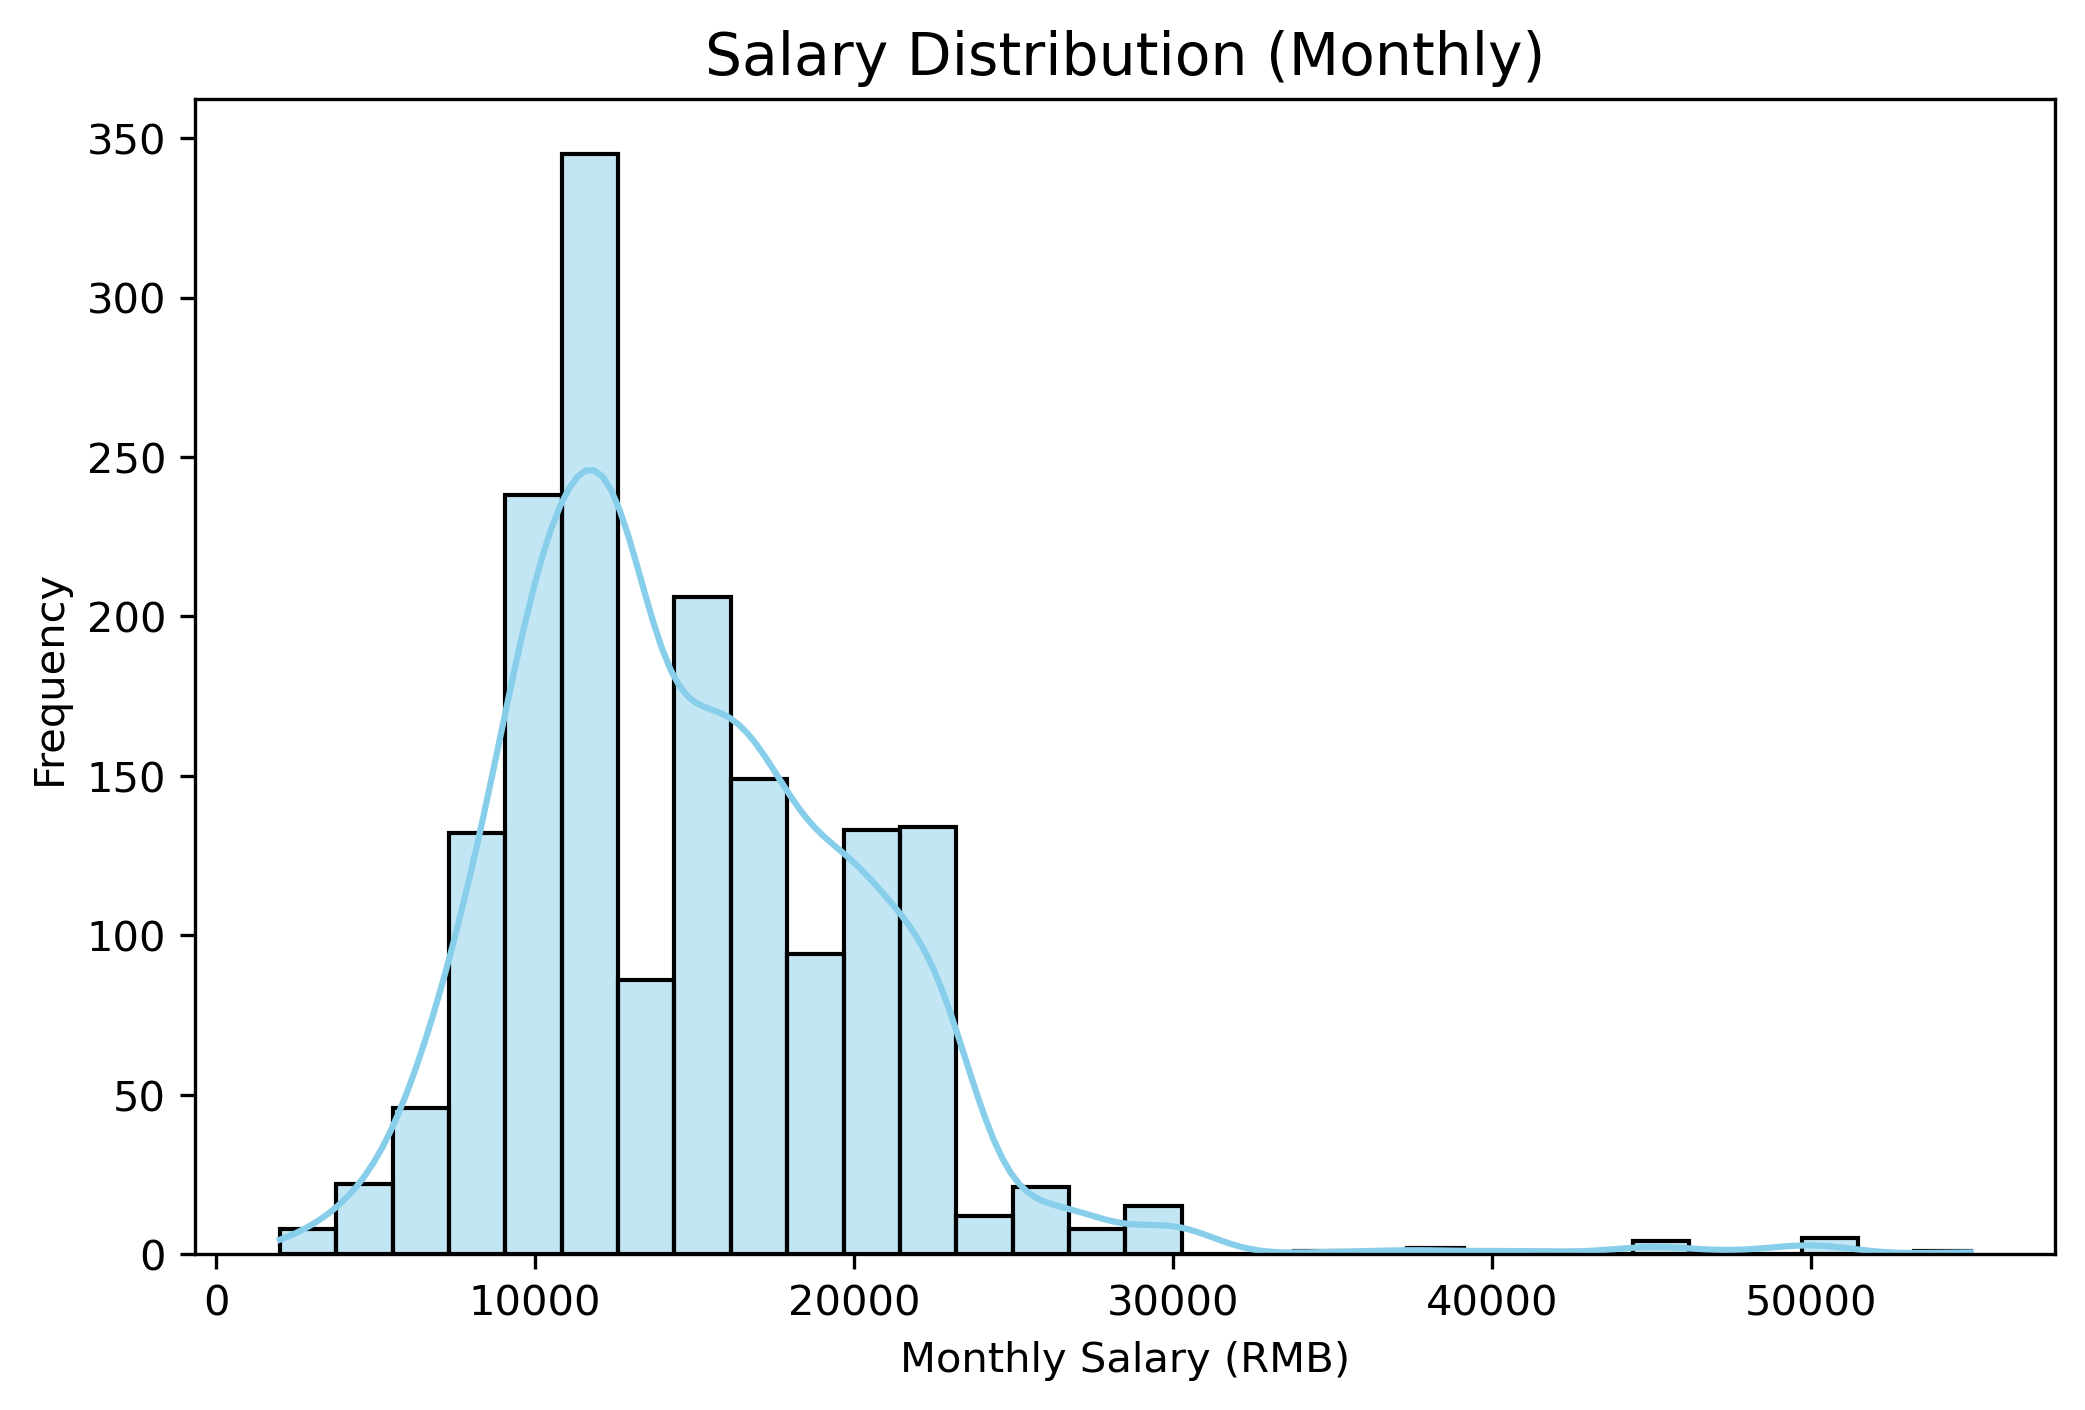

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("coded_factors.csv", encoding='utf-8')

plt.figure(figsize=(8,5))
sns.histplot(df['monthly_salary_avg'], kde=True, bins=30, color='skyblue')
plt.title("Salary Distribution (Monthly)", fontsize=14)
plt.xlabel("Monthly Salary (RMB)")
plt.ylabel("Frequency")
plt.show()

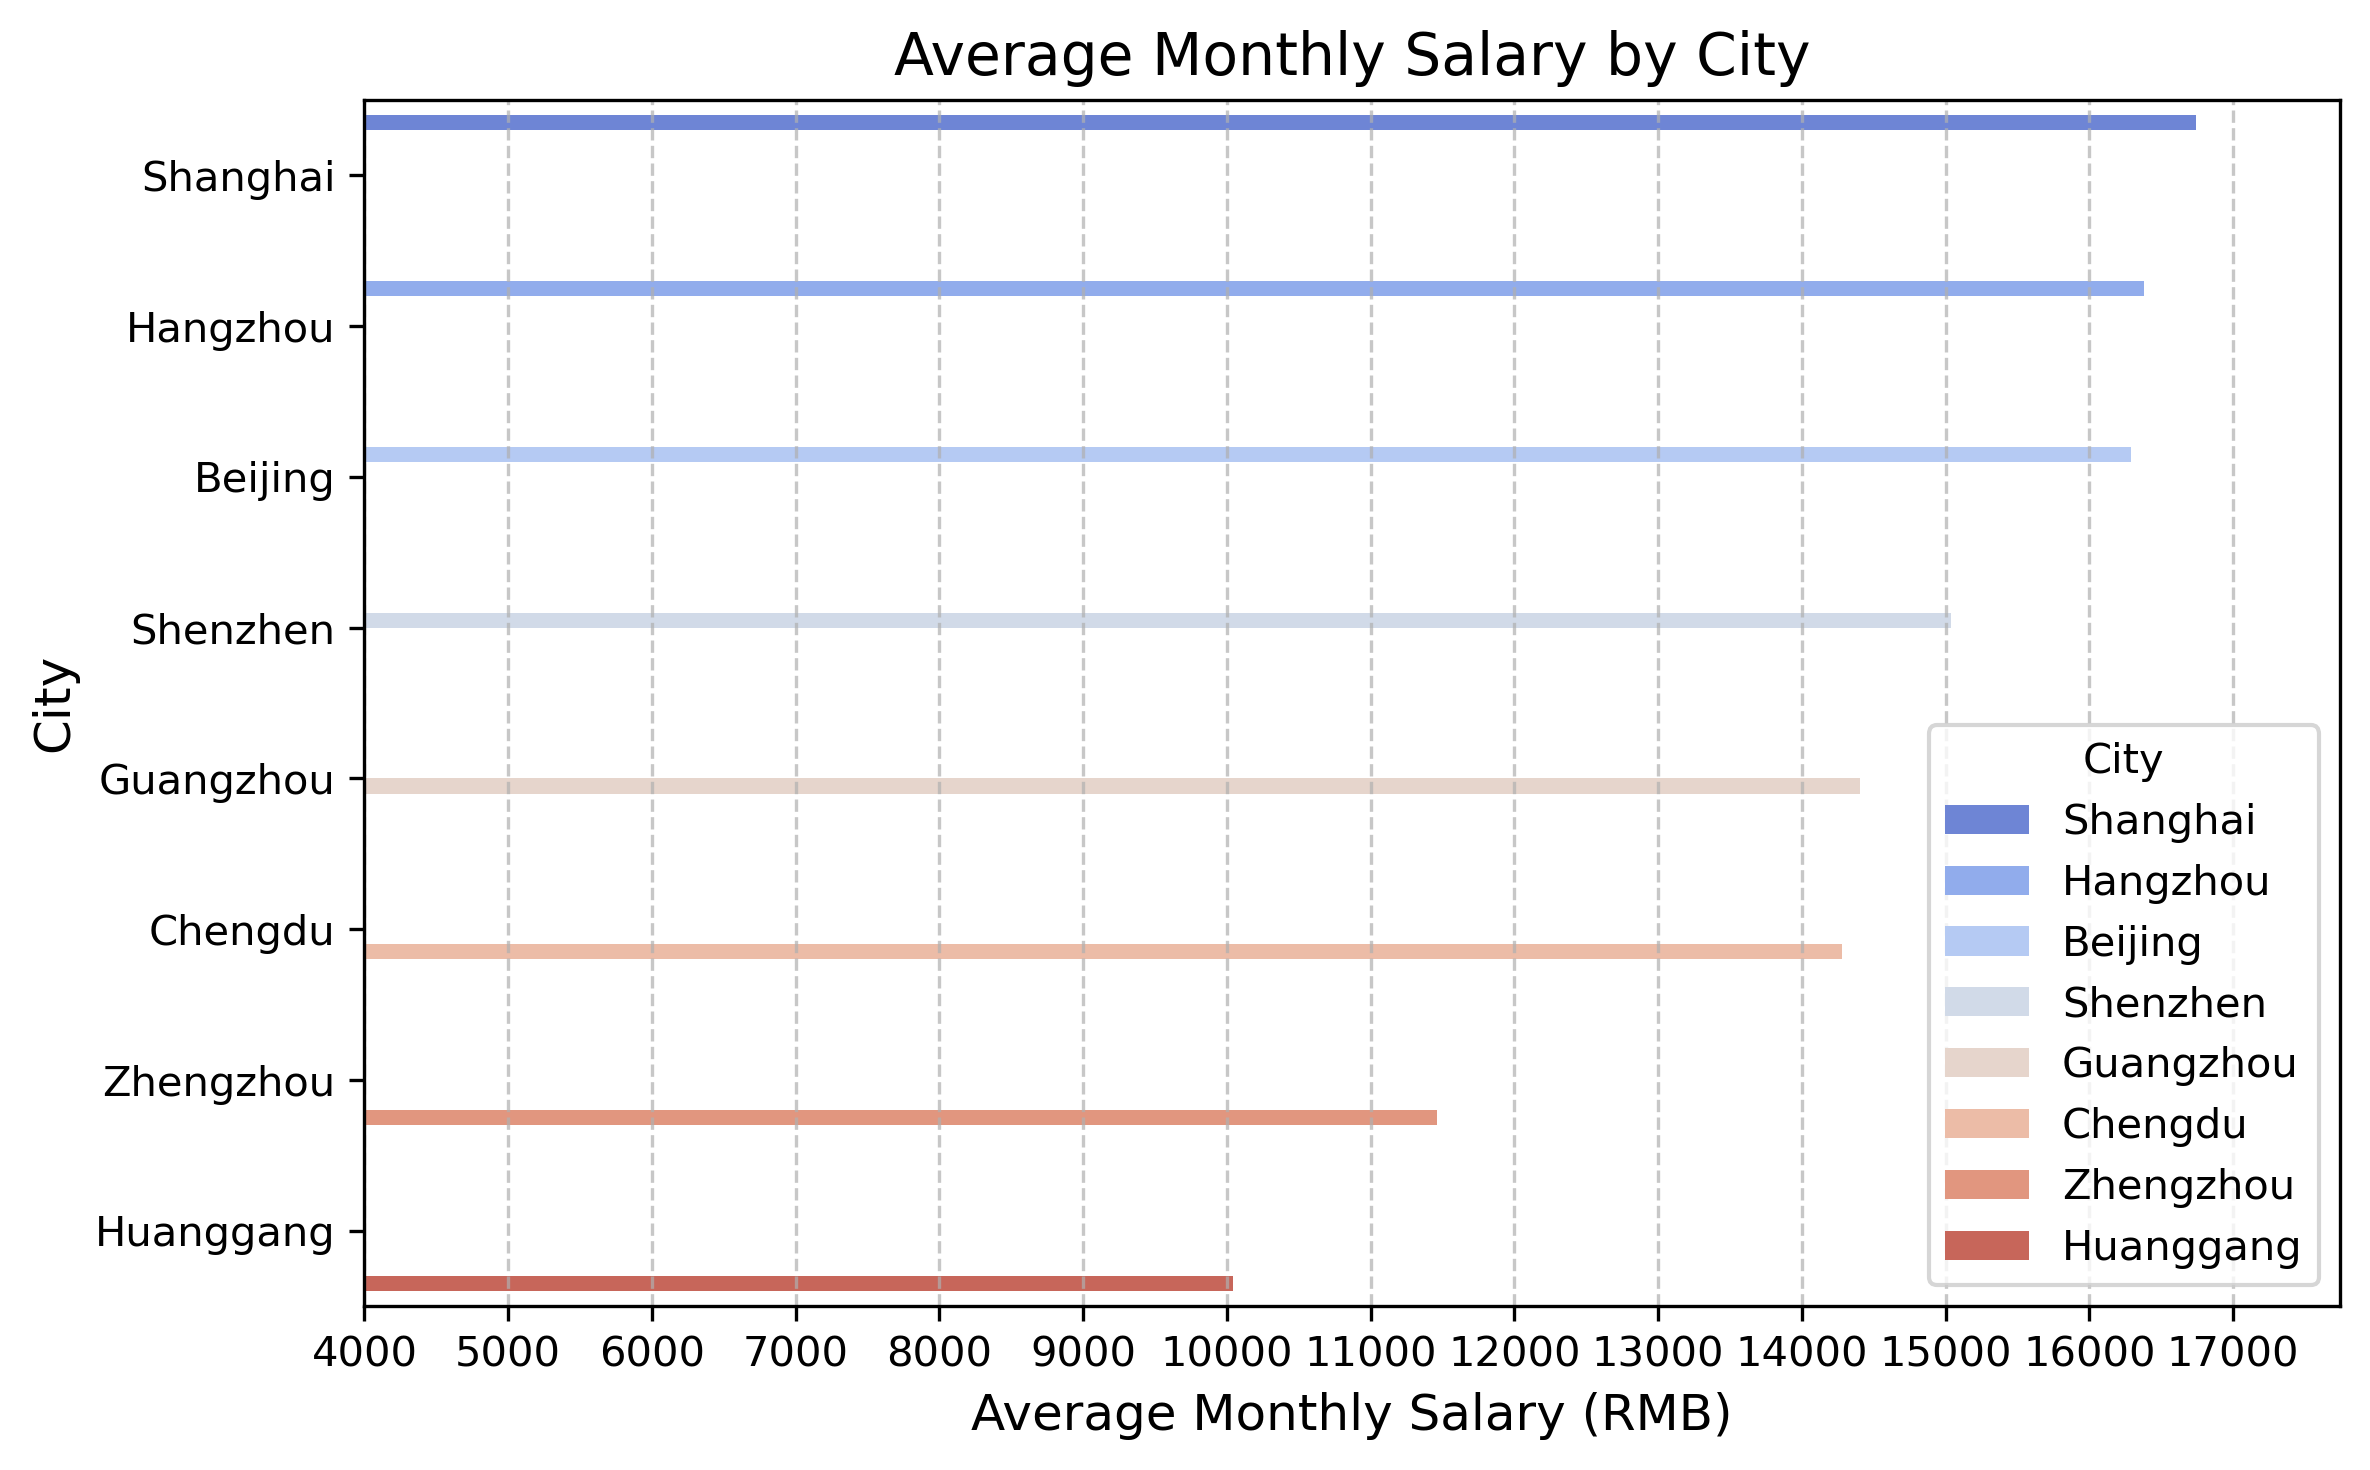

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("coded_factors.csv", encoding='utf-8')

city_map = {
    1: 'Beijing', 2: 'Chengdu', 3: 'Guangzhou',
    4: 'Hangzhou', 5: 'Huanggang', 6: 'Shanghai',
    7: 'Shenzhen', 8: 'Zhengzhou'
}
df['city_name'] = df['city'].map(city_map)

city_salary = df.groupby('city_name')['monthly_salary_avg'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='monthly_salary_avg',
    y='city_name',
    data=city_salary.sort_values('monthly_salary_avg', ascending=False),
    hue='city_name',
    palette='coolwarm',
)

plt.title("Average Monthly Salary by City", fontsize=14)
plt.xlabel("Average Monthly Salary (RMB)", fontsize=12)
plt.ylabel("City", fontsize=12)

plt.legend(title='City')

xmin, xmax = 4000, city_salary['monthly_salary_avg'].max() + 1000
plt.xlim(xmin, xmax)
plt.xticks(np.arange(xmin, xmax+1, 1000)) 

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

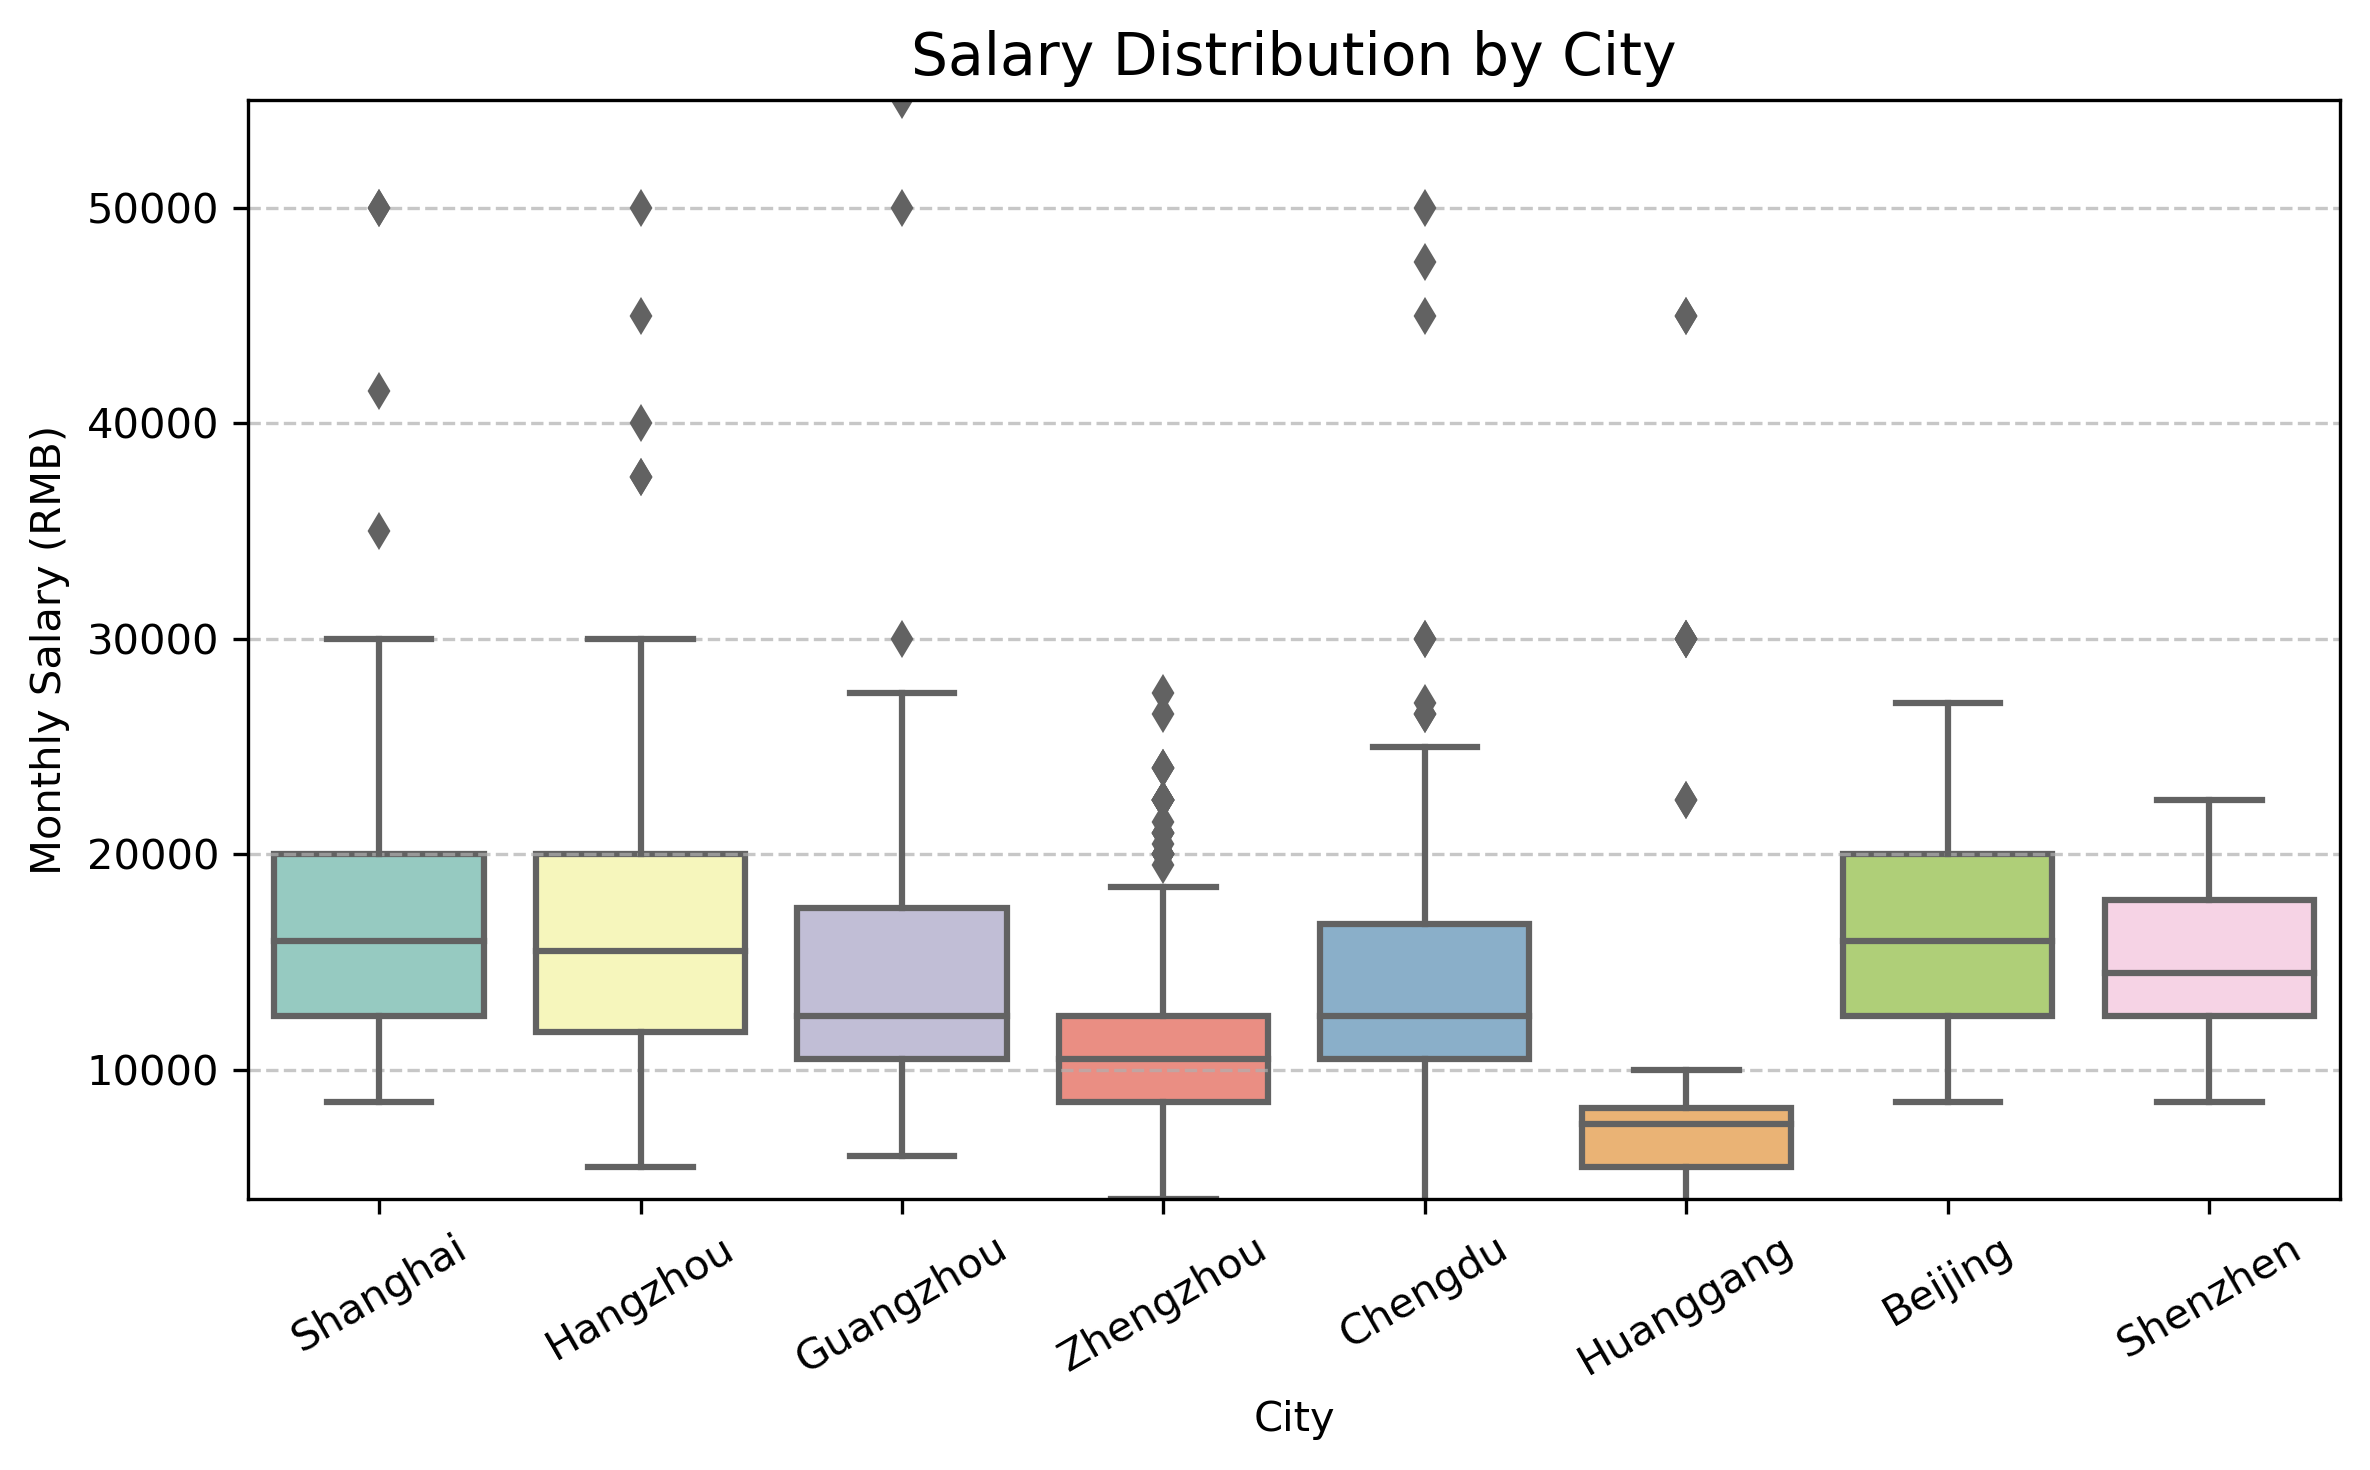

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='city_name', y='monthly_salary_avg', data=df, palette='Set3')
plt.title("Salary Distribution by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max()) 
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

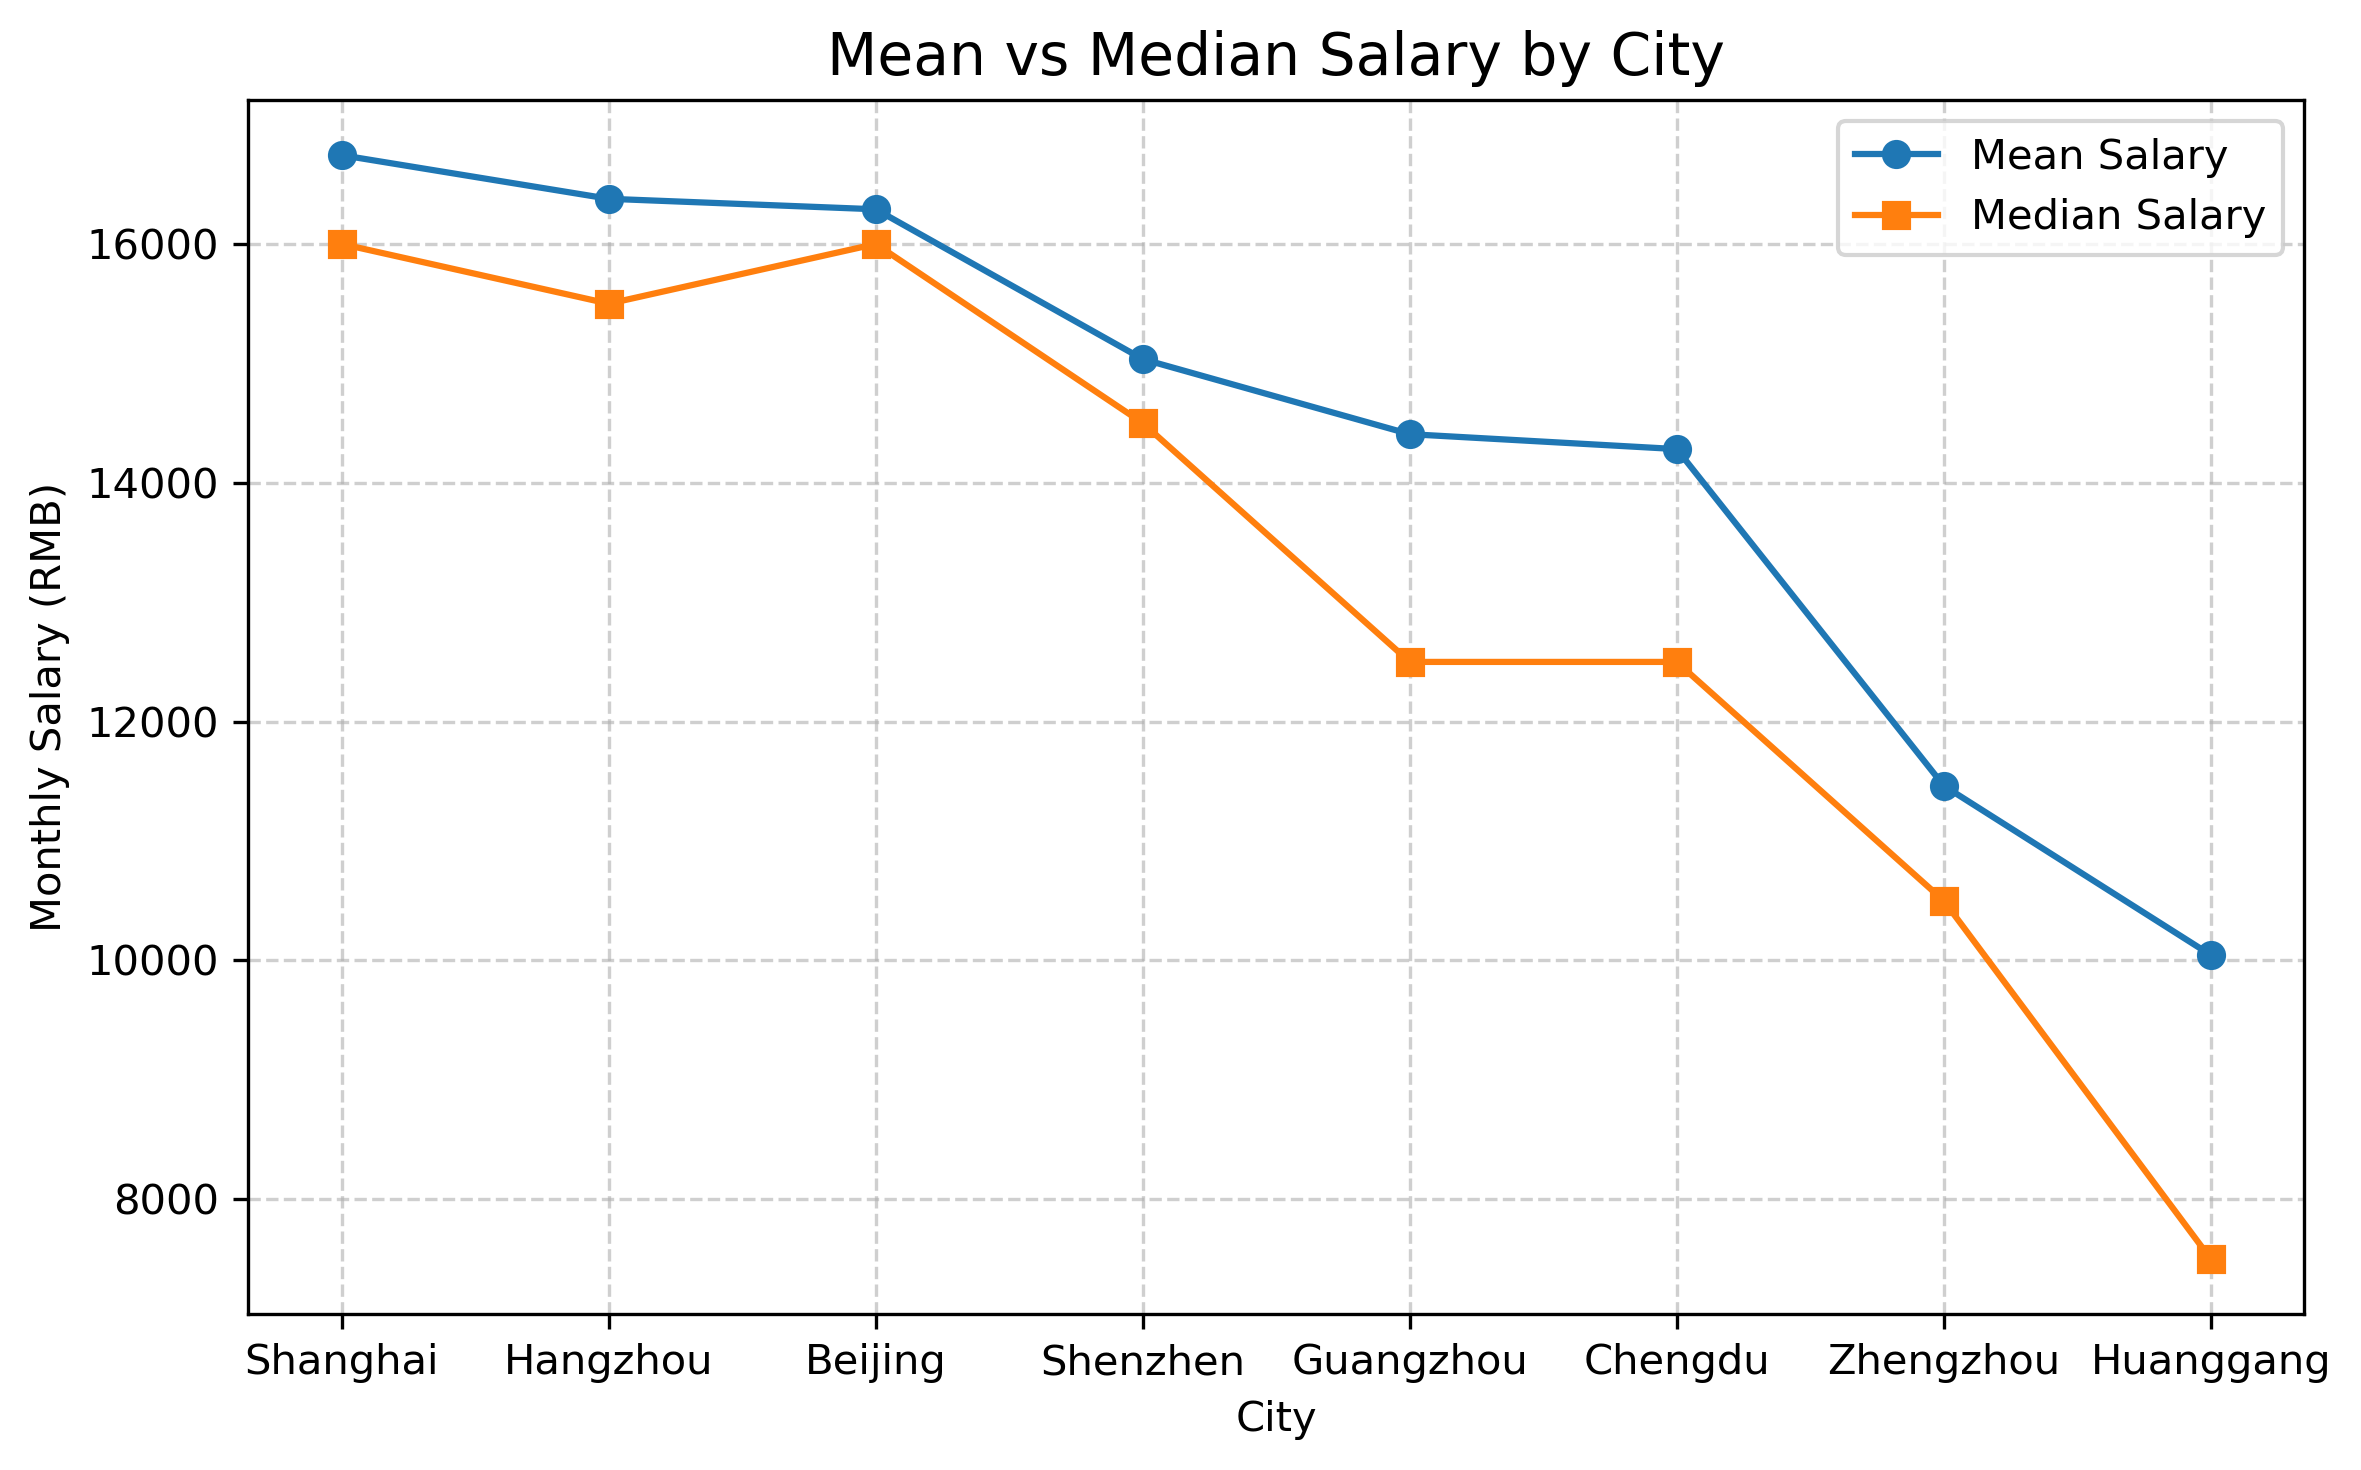

In [35]:
agg_city = df.groupby('city_name')['monthly_salary_avg'].agg(['mean','median']).reset_index()
agg_city = agg_city.sort_values('mean', ascending=False)

plt.figure(figsize=(8,5))
plt.plot(agg_city['city_name'], agg_city['mean'], marker='o', label='Mean Salary')
plt.plot(agg_city['city_name'], agg_city['median'], marker='s', label='Median Salary')
plt.title("Mean vs Median Salary by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Monthly Salary (RMB)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

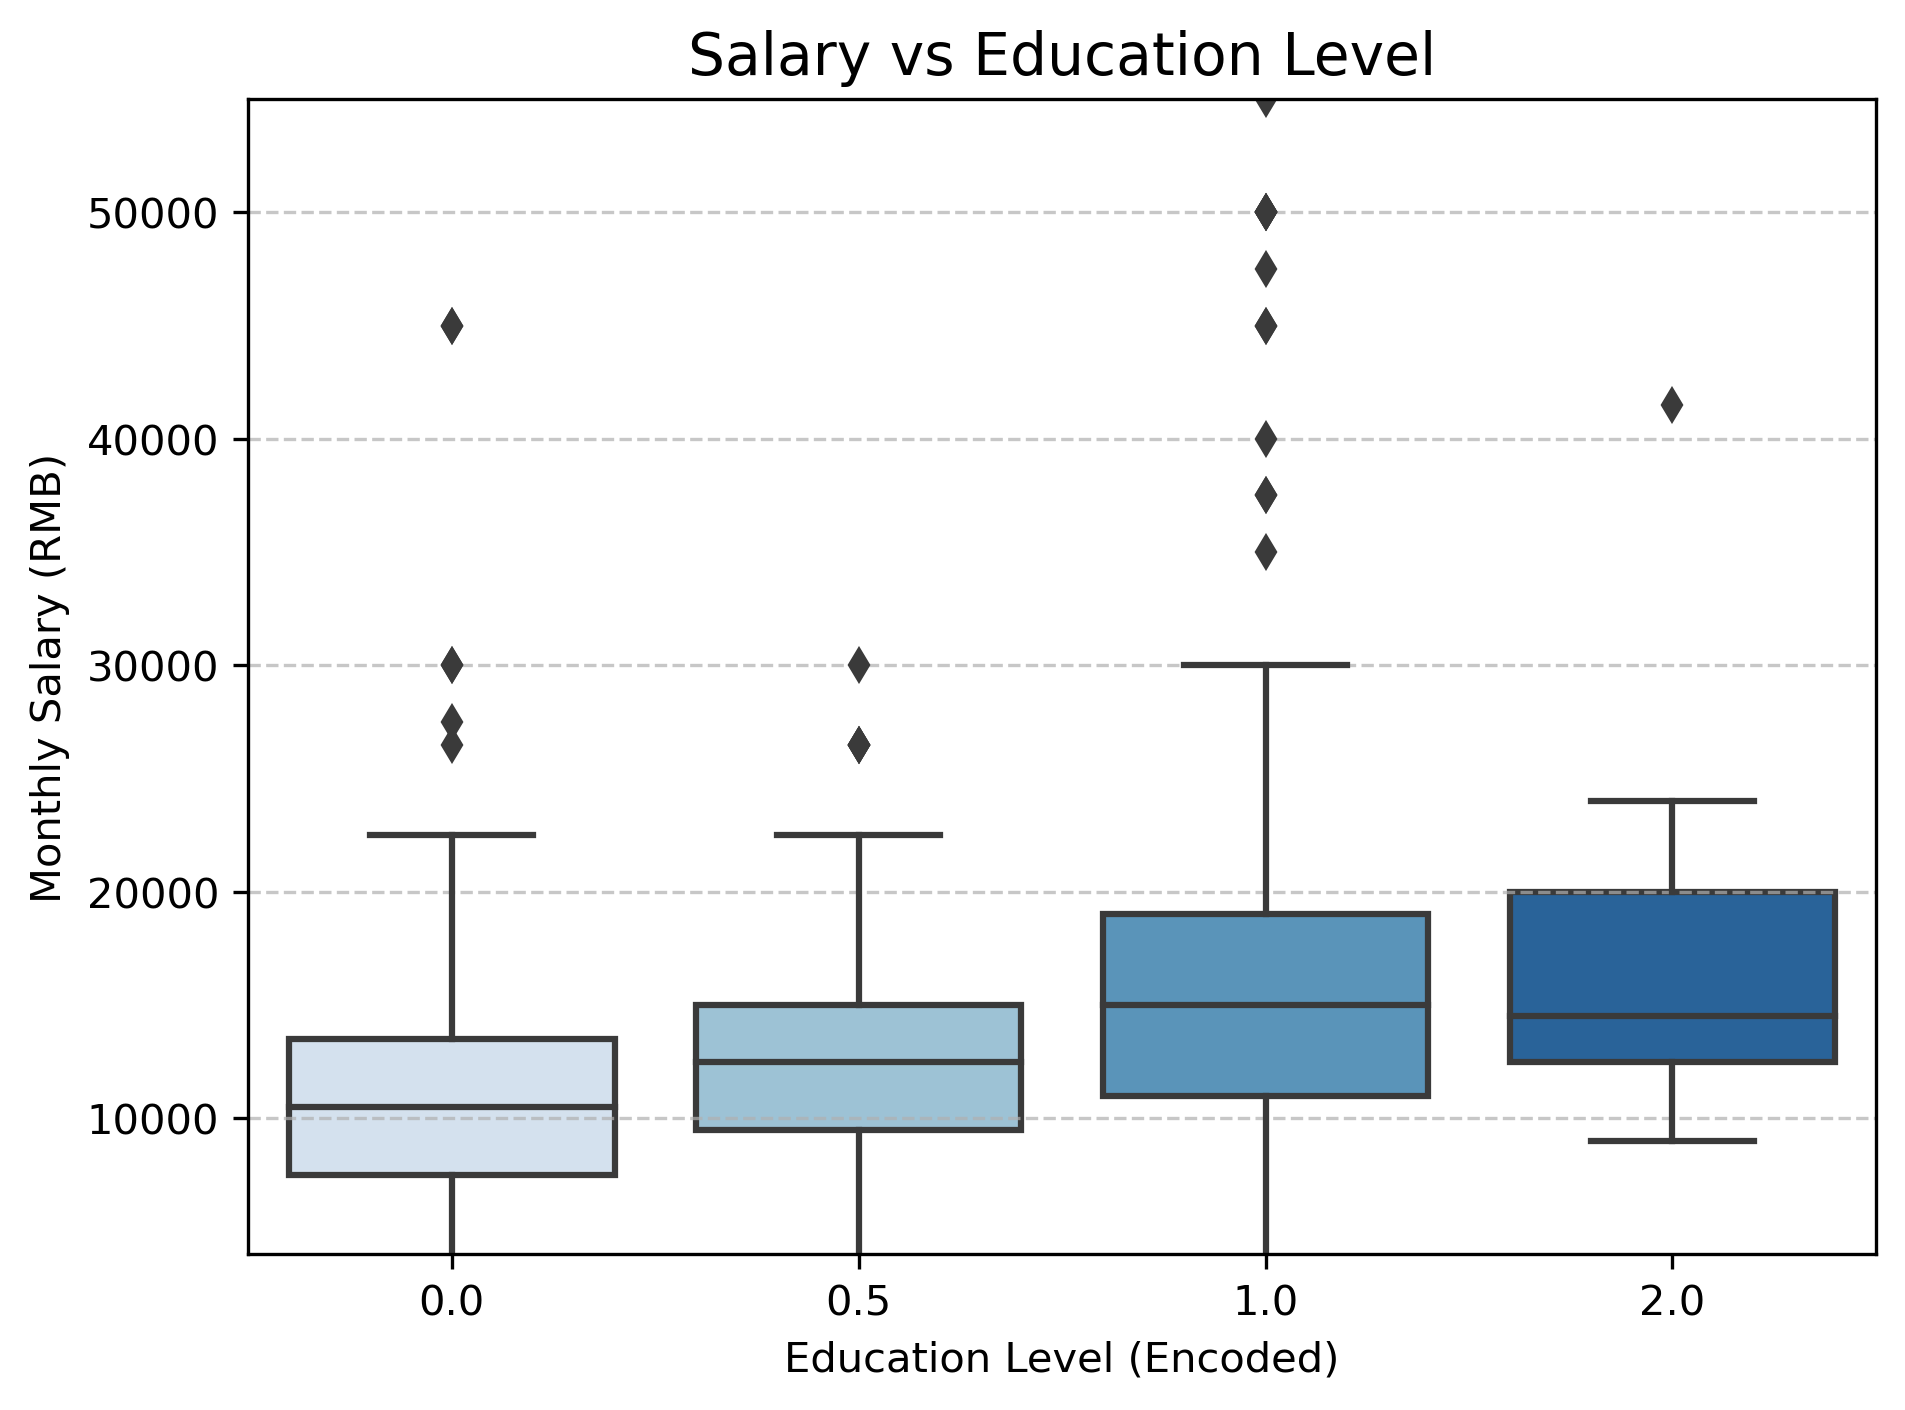

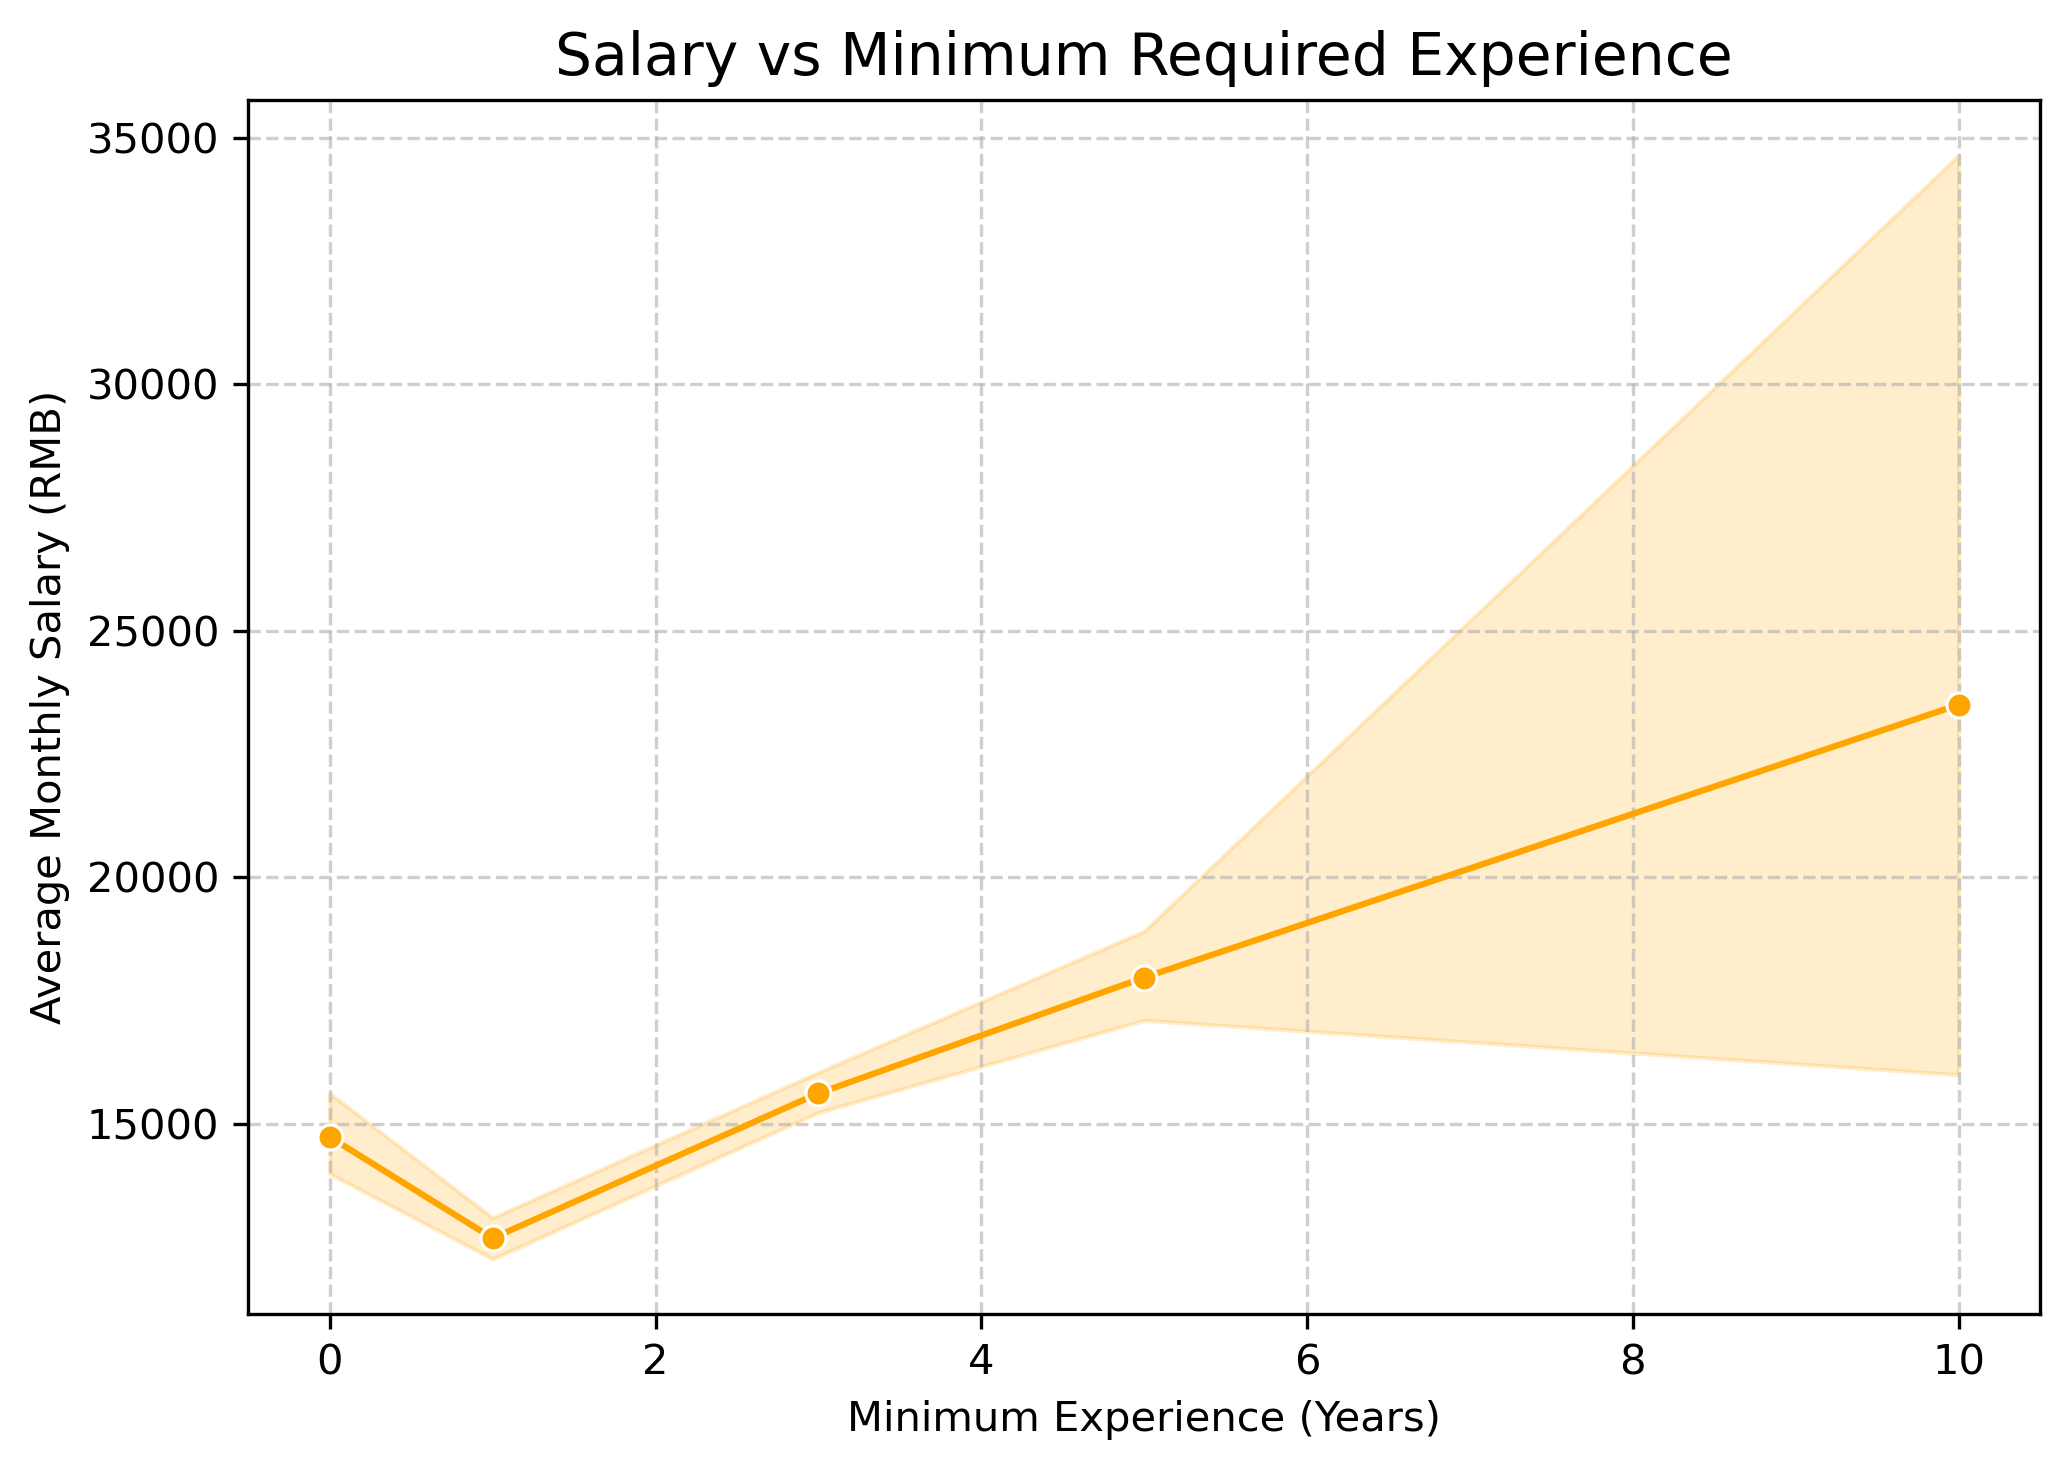

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x='education', y='monthly_salary_avg', data=df, palette='Blues')
plt.title("Salary vs Education Level", fontsize=14)
plt.xlabel("Education Level (Encoded)")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(7,5))
sns.lineplot(x='experience_atleast', y='monthly_salary_avg', data=df, marker='o', color='orange')
plt.title("Salary vs Minimum Required Experience", fontsize=14)
plt.xlabel("Minimum Experience (Years)")
plt.ylabel("Average Monthly Salary (RMB)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


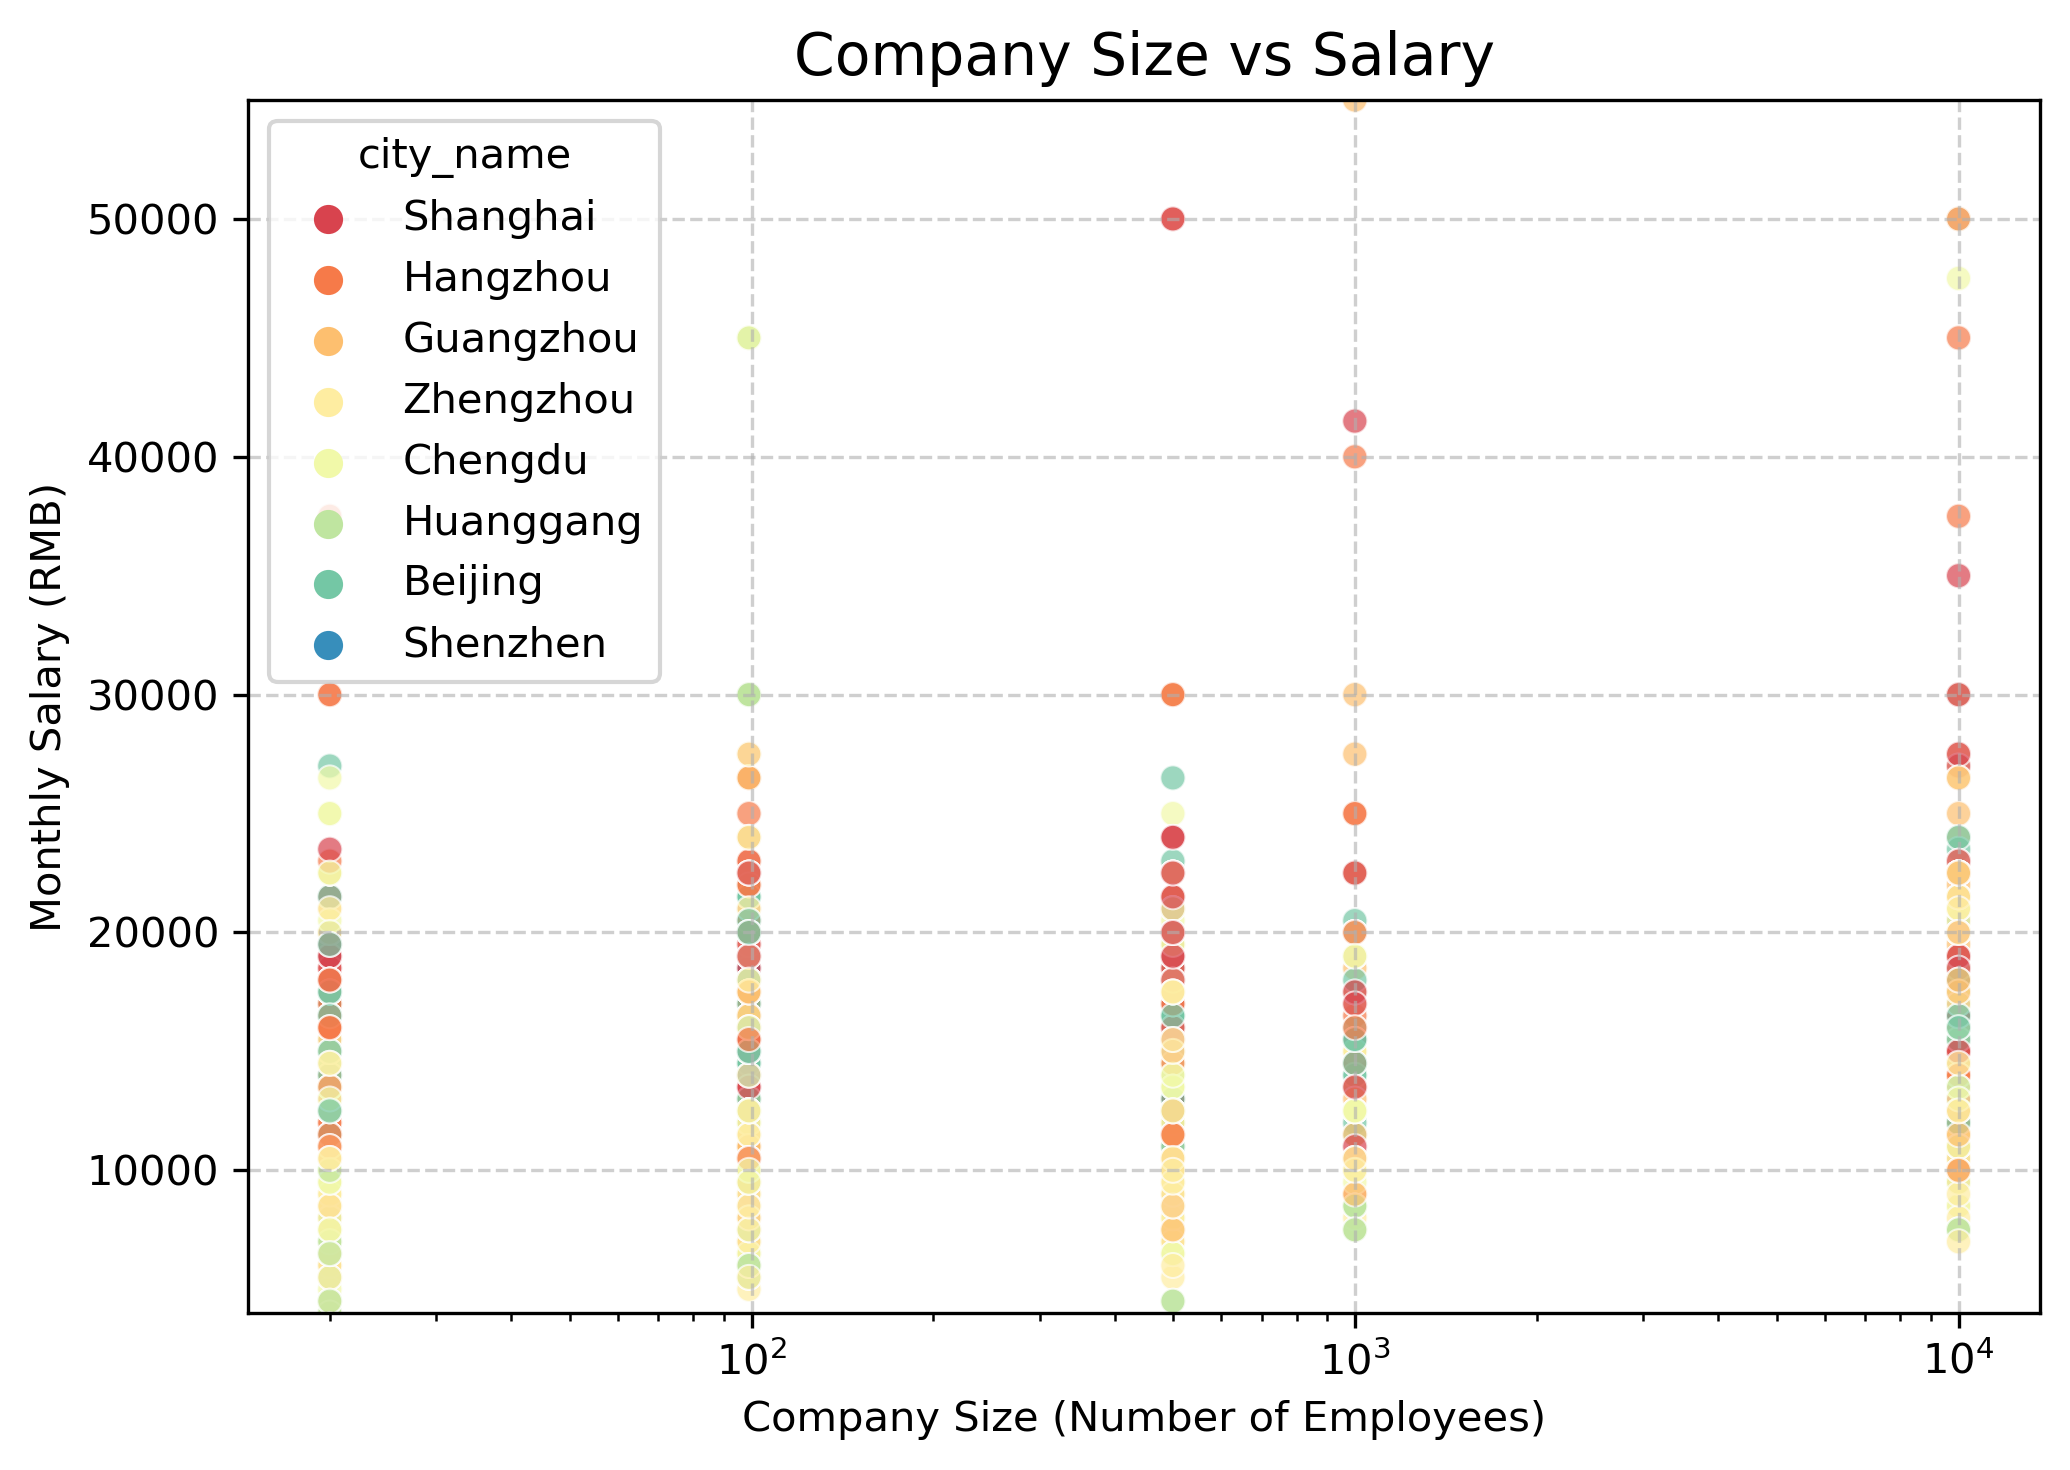

In [37]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='size(employees_number)', y='monthly_salary_avg', data=df, hue='city_name', palette='Spectral', alpha=0.7)
plt.title("Company Size vs Salary", fontsize=14)
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Monthly Salary (RMB)")
plt.xscale('log')  
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

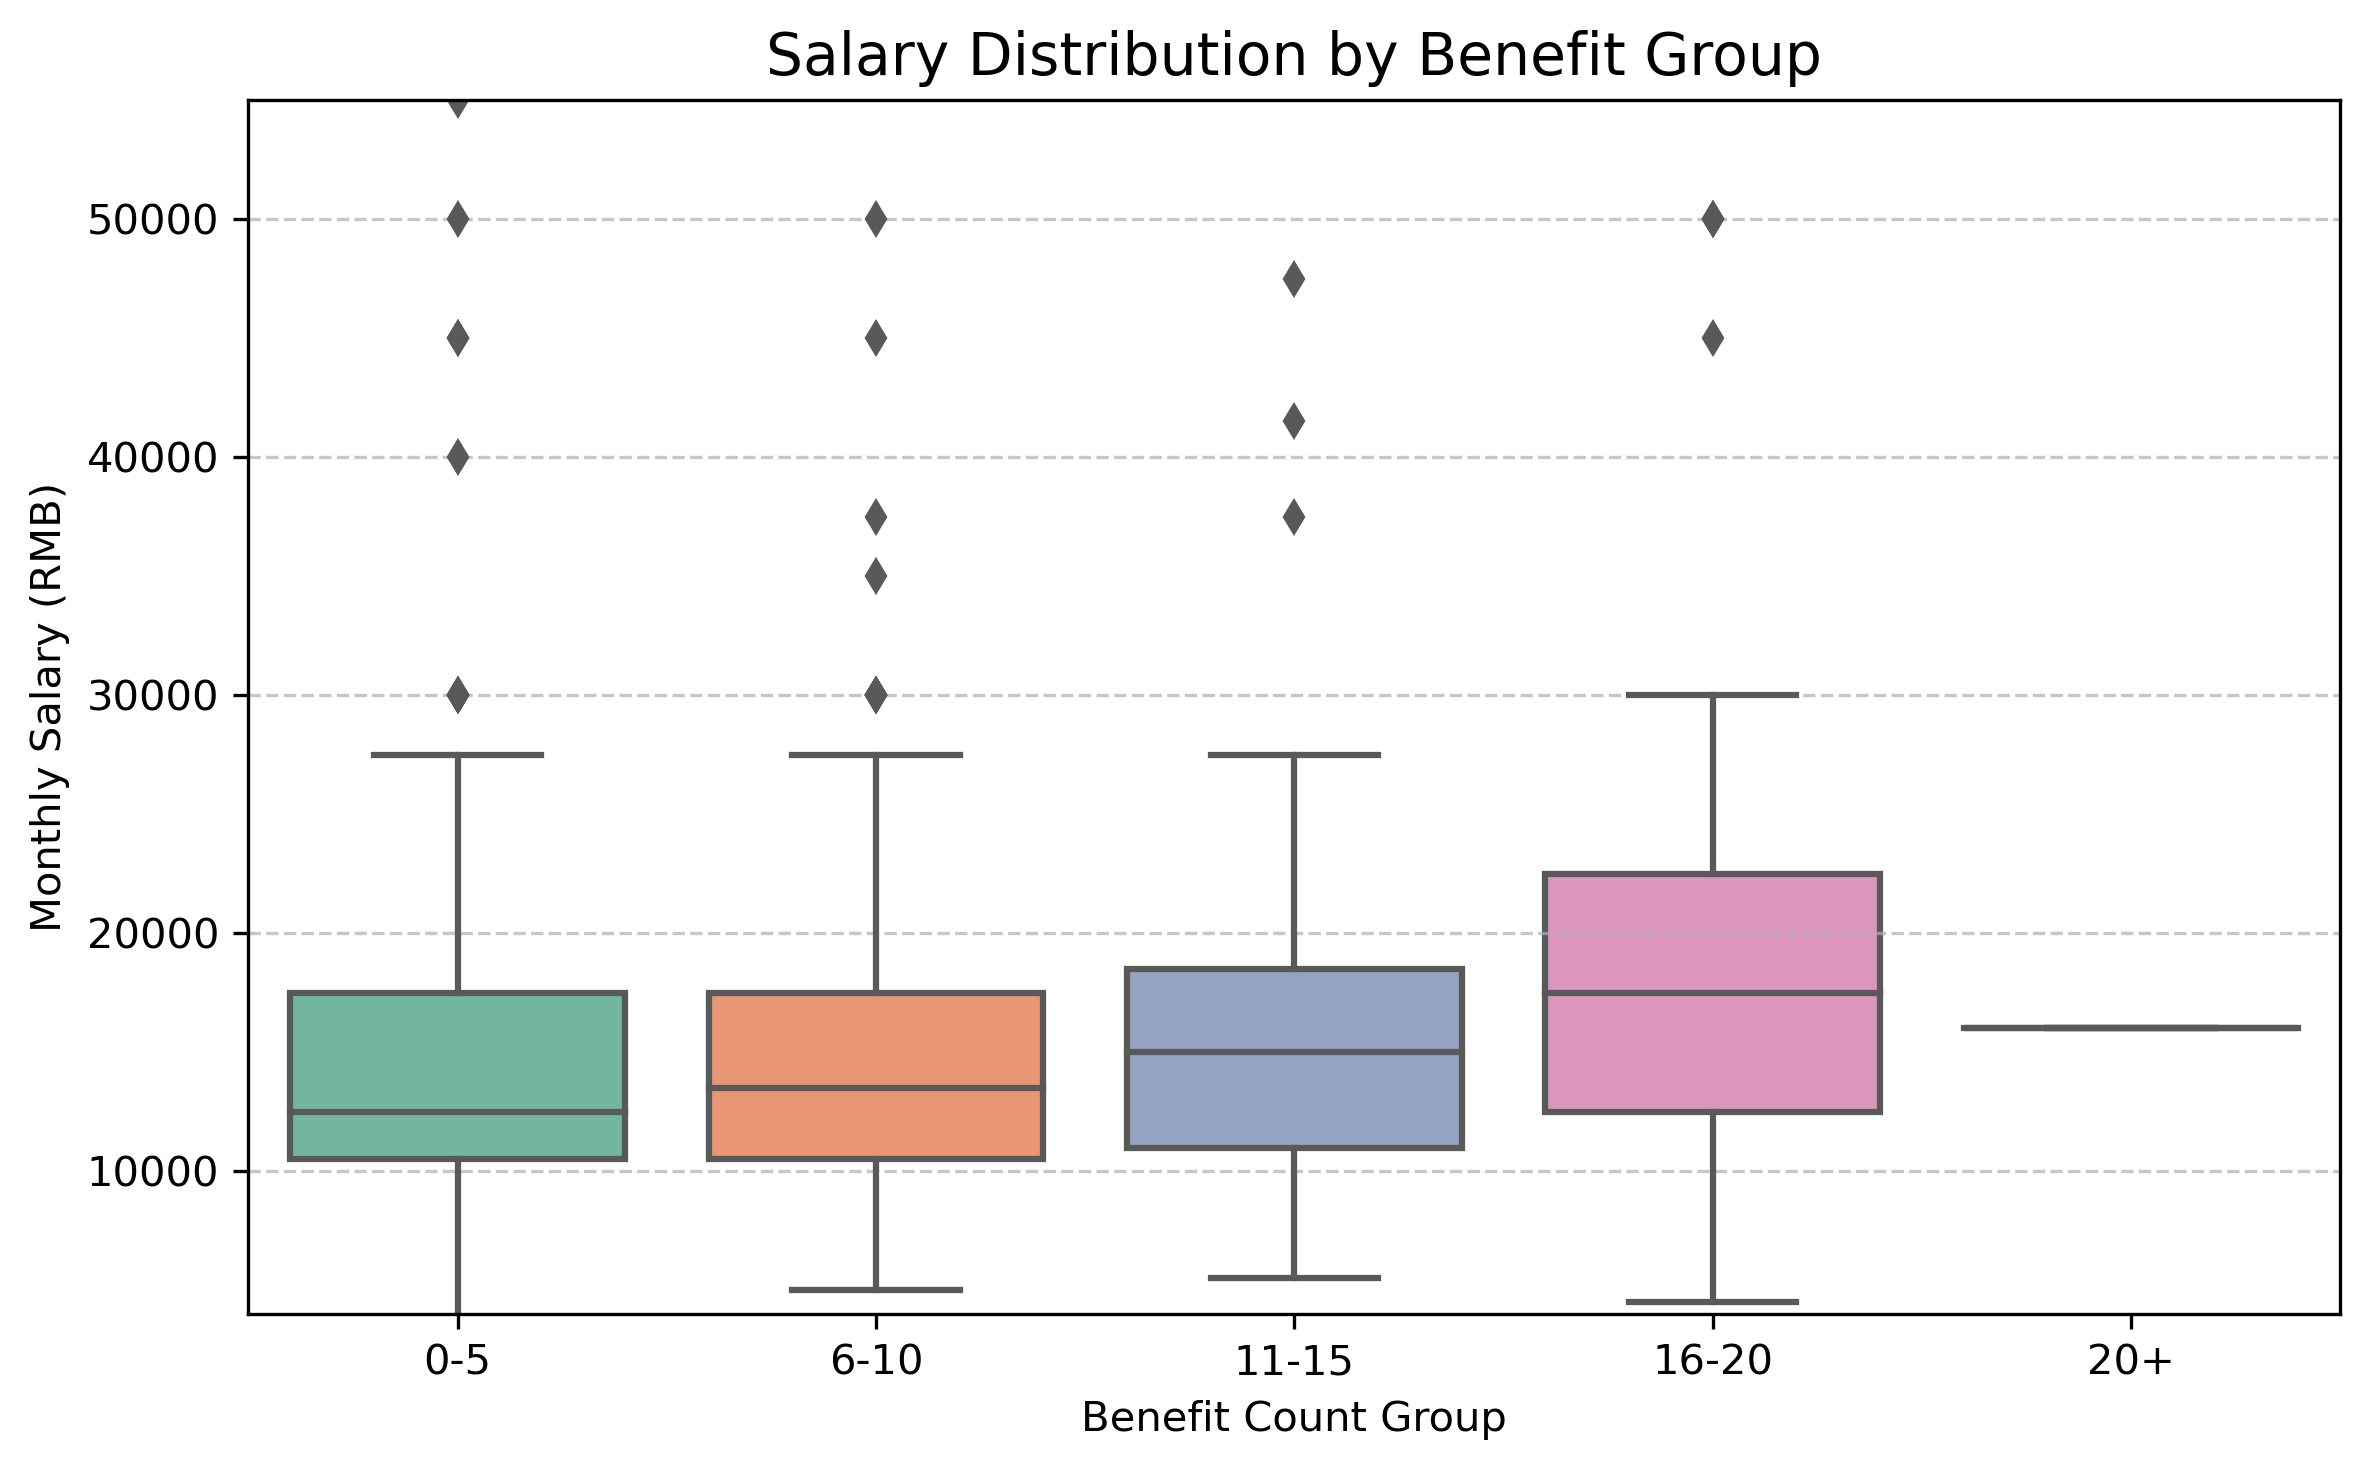

In [38]:
df['benefit_group'] = pd.cut(
    df['benifit'],
    bins=[-1,5,10,15,20,50],
    labels=['0-5','6-10','11-15','16-20','20+']
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x='benefit_group',
    y='monthly_salary_avg',
    data=df,
    palette='Set2'
)
plt.title("Salary Distribution by Benefit Group", fontsize=14)
plt.xlabel("Benefit Count Group")
plt.ylabel("Monthly Salary (RMB)")
plt.ylim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

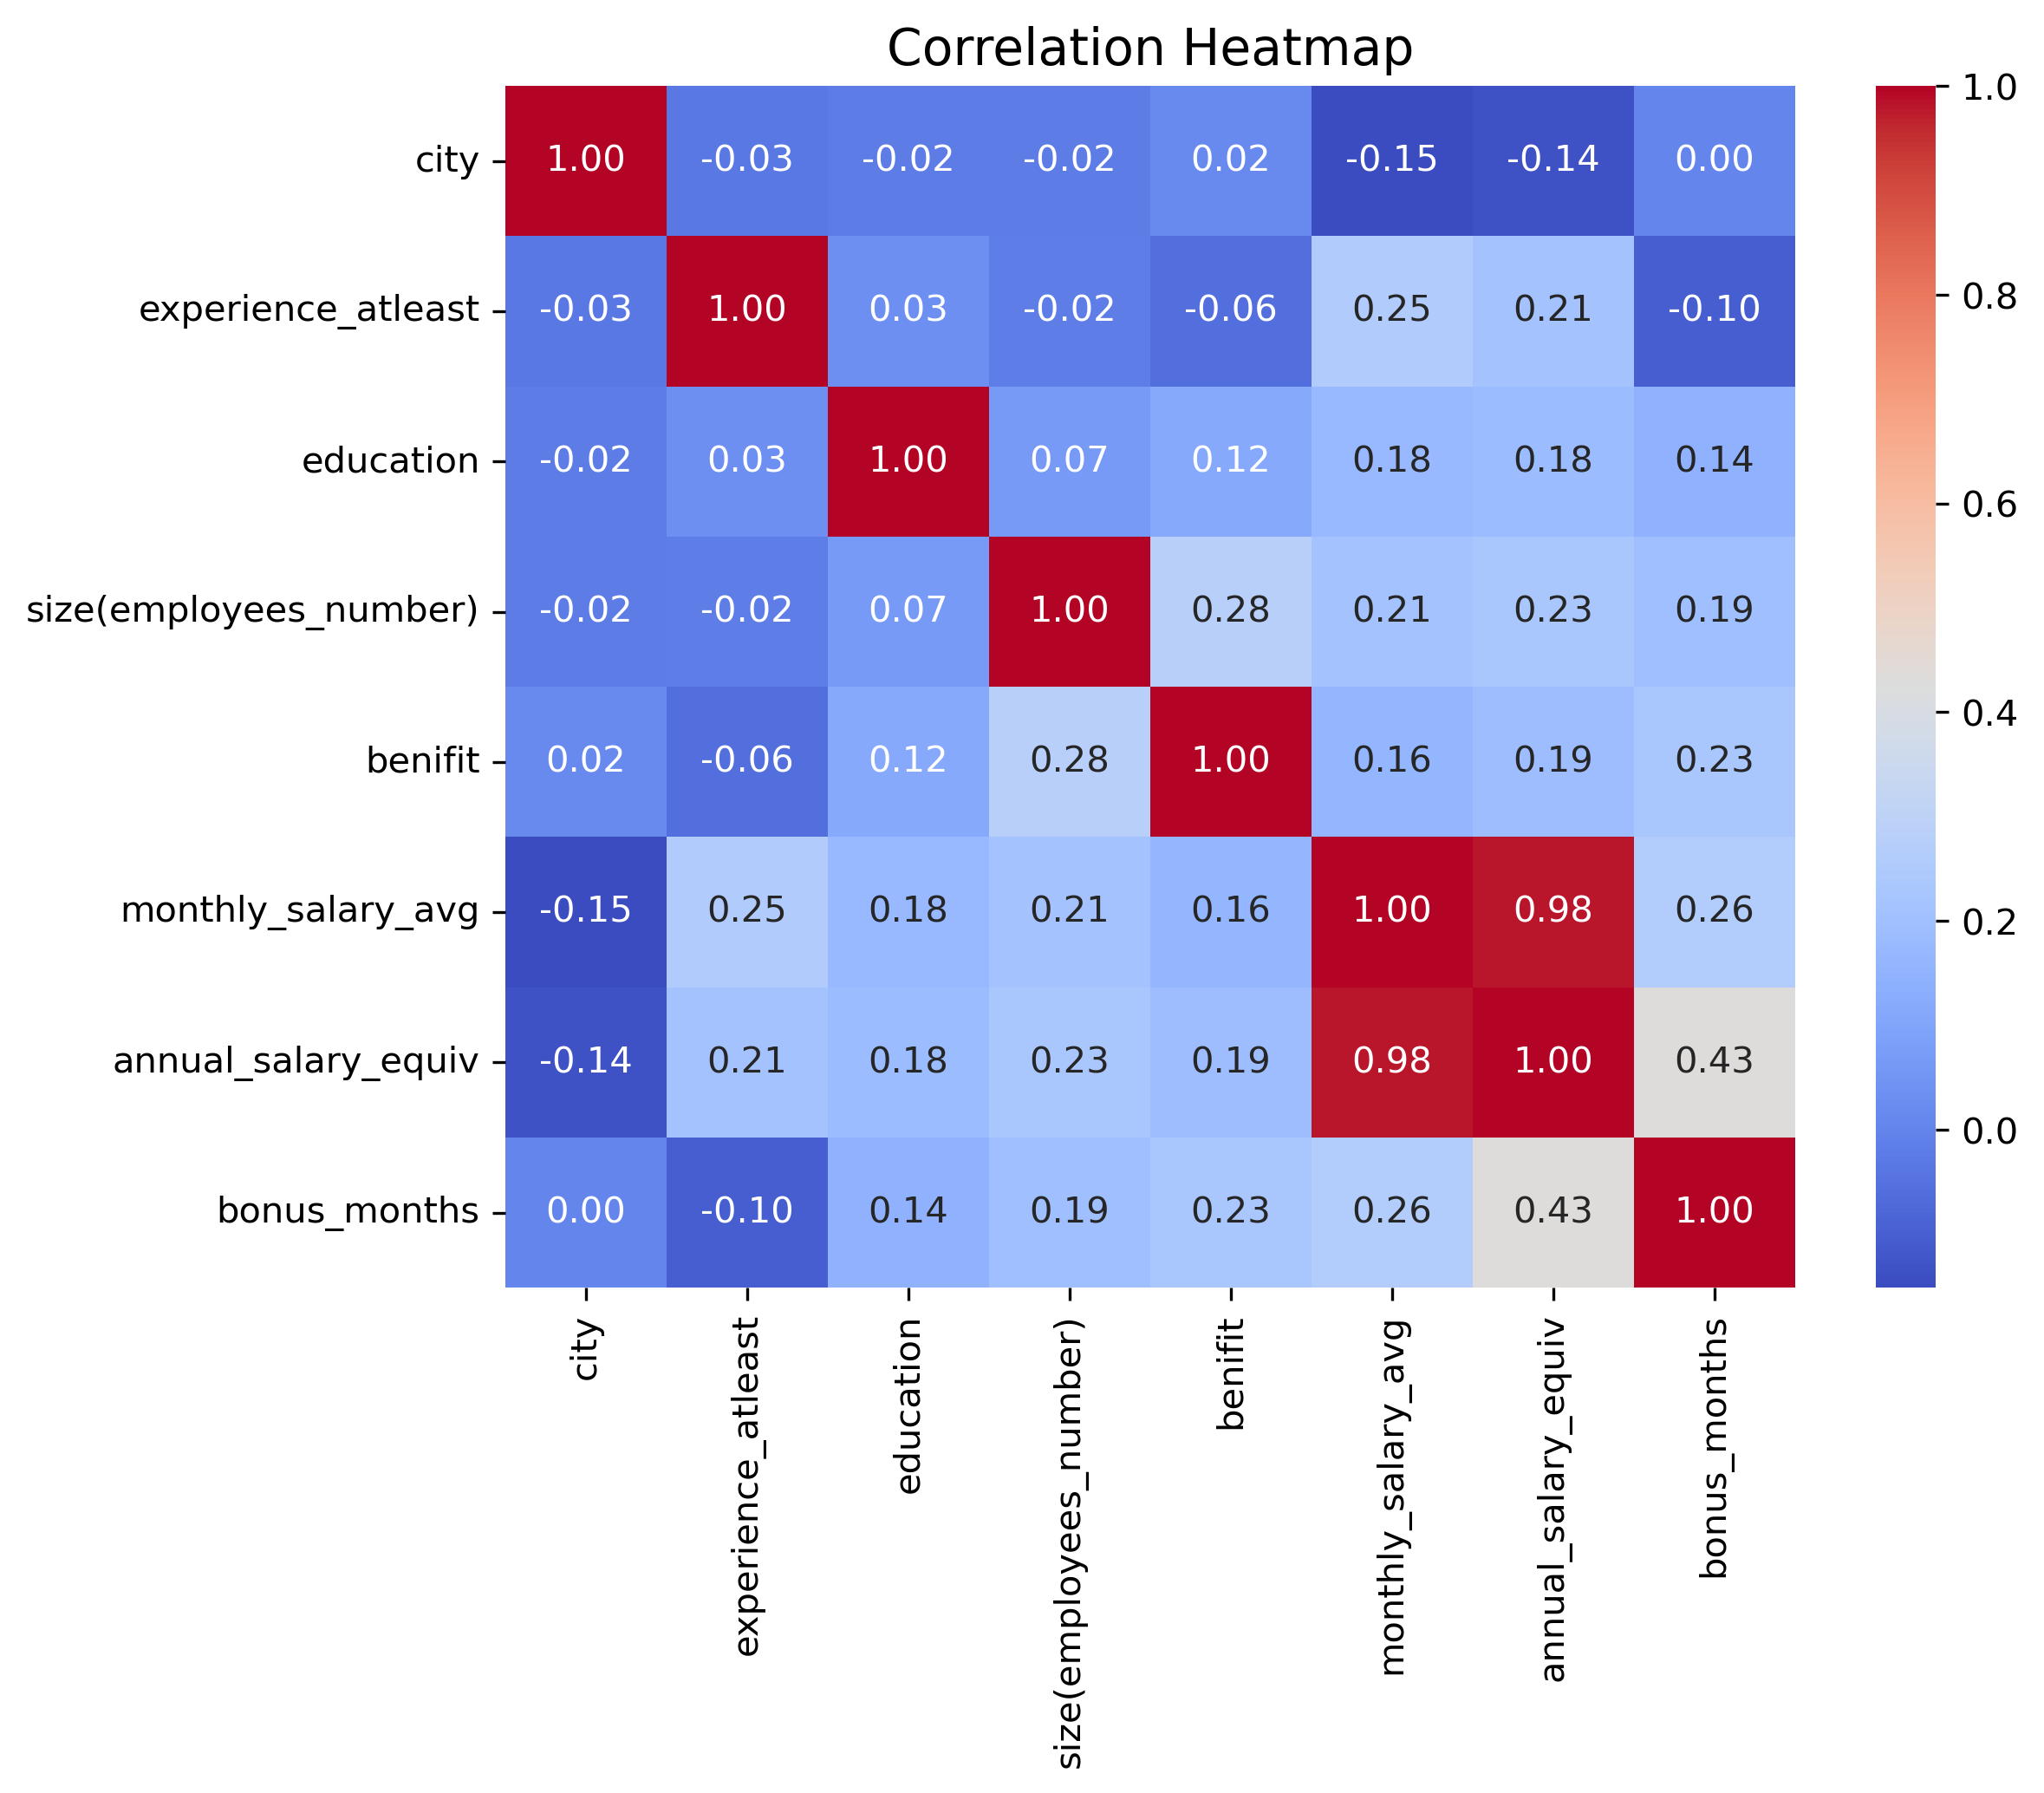

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


Detected position column：position_category

Average Salary Table by Position：
  position_category          mean   median  count
0              1_AI  16910.714286  15500.0    112
2            3_test  15940.000000  13500.0     25
1             2_dev  15026.631658  14000.0   1333
5            6_data  14186.746988  13500.0     83
4              5_PA  12553.191489  11500.0     47
3           4_train   8453.846154   8000.0     65


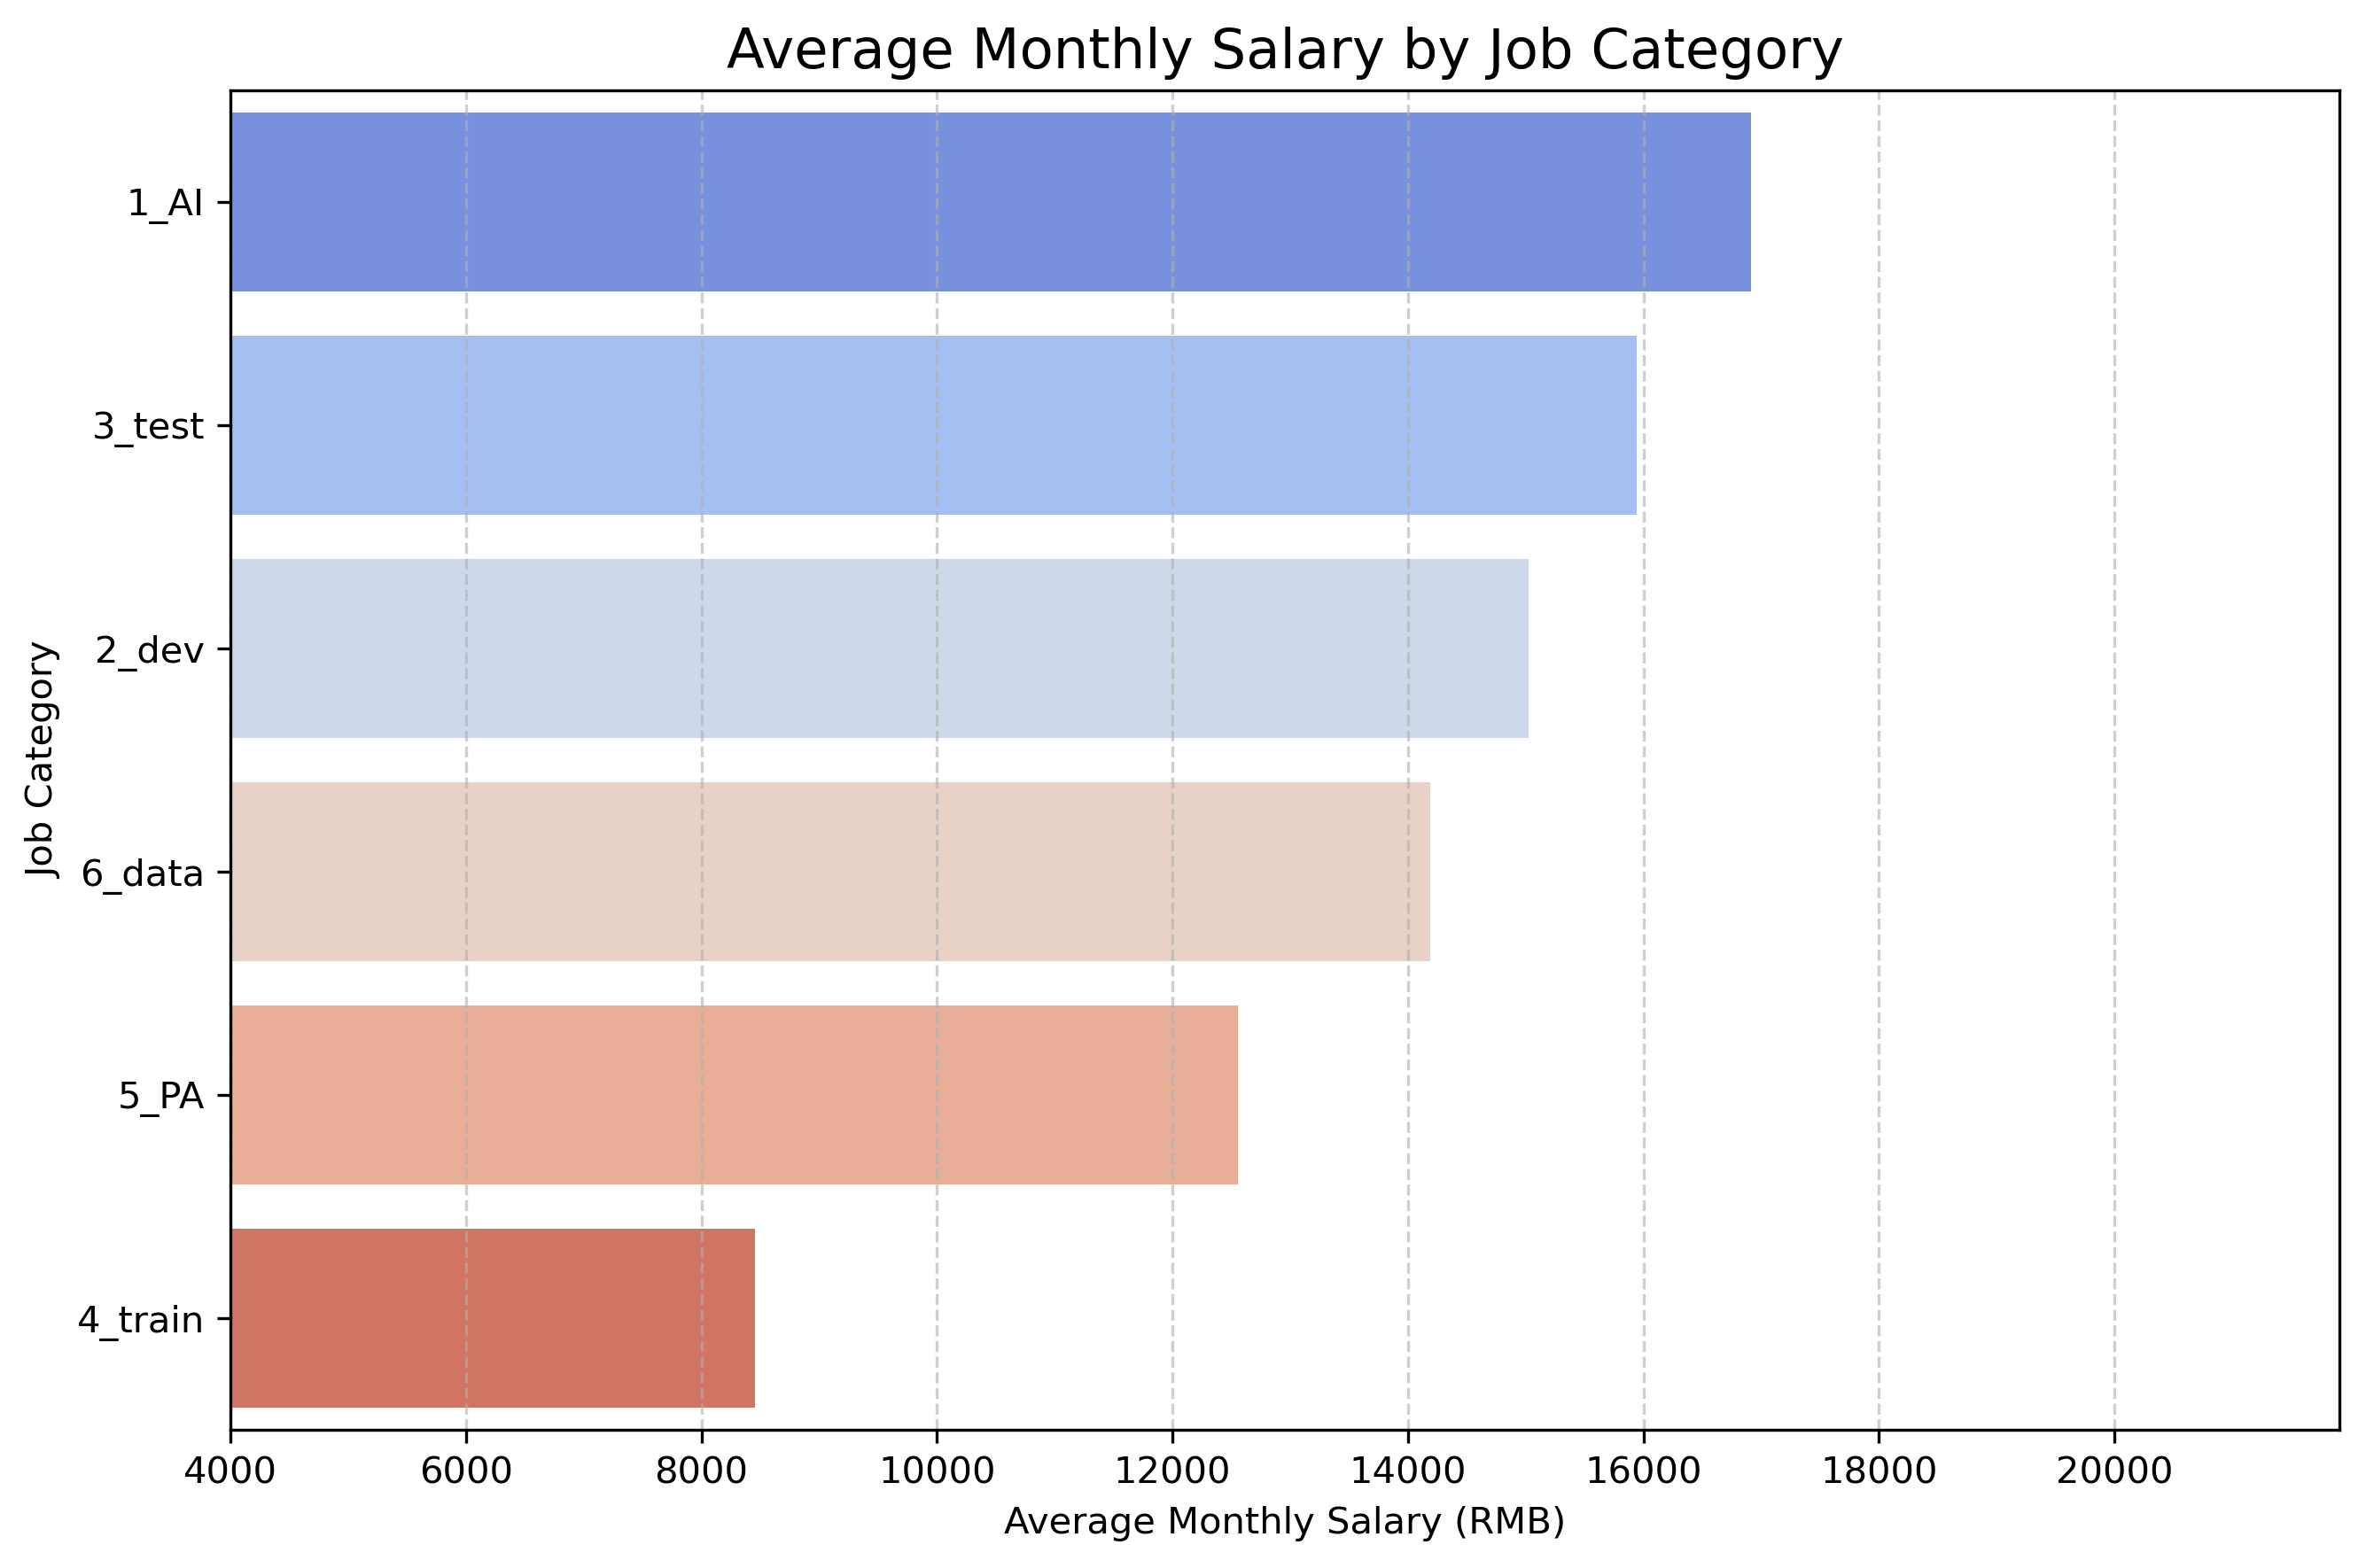

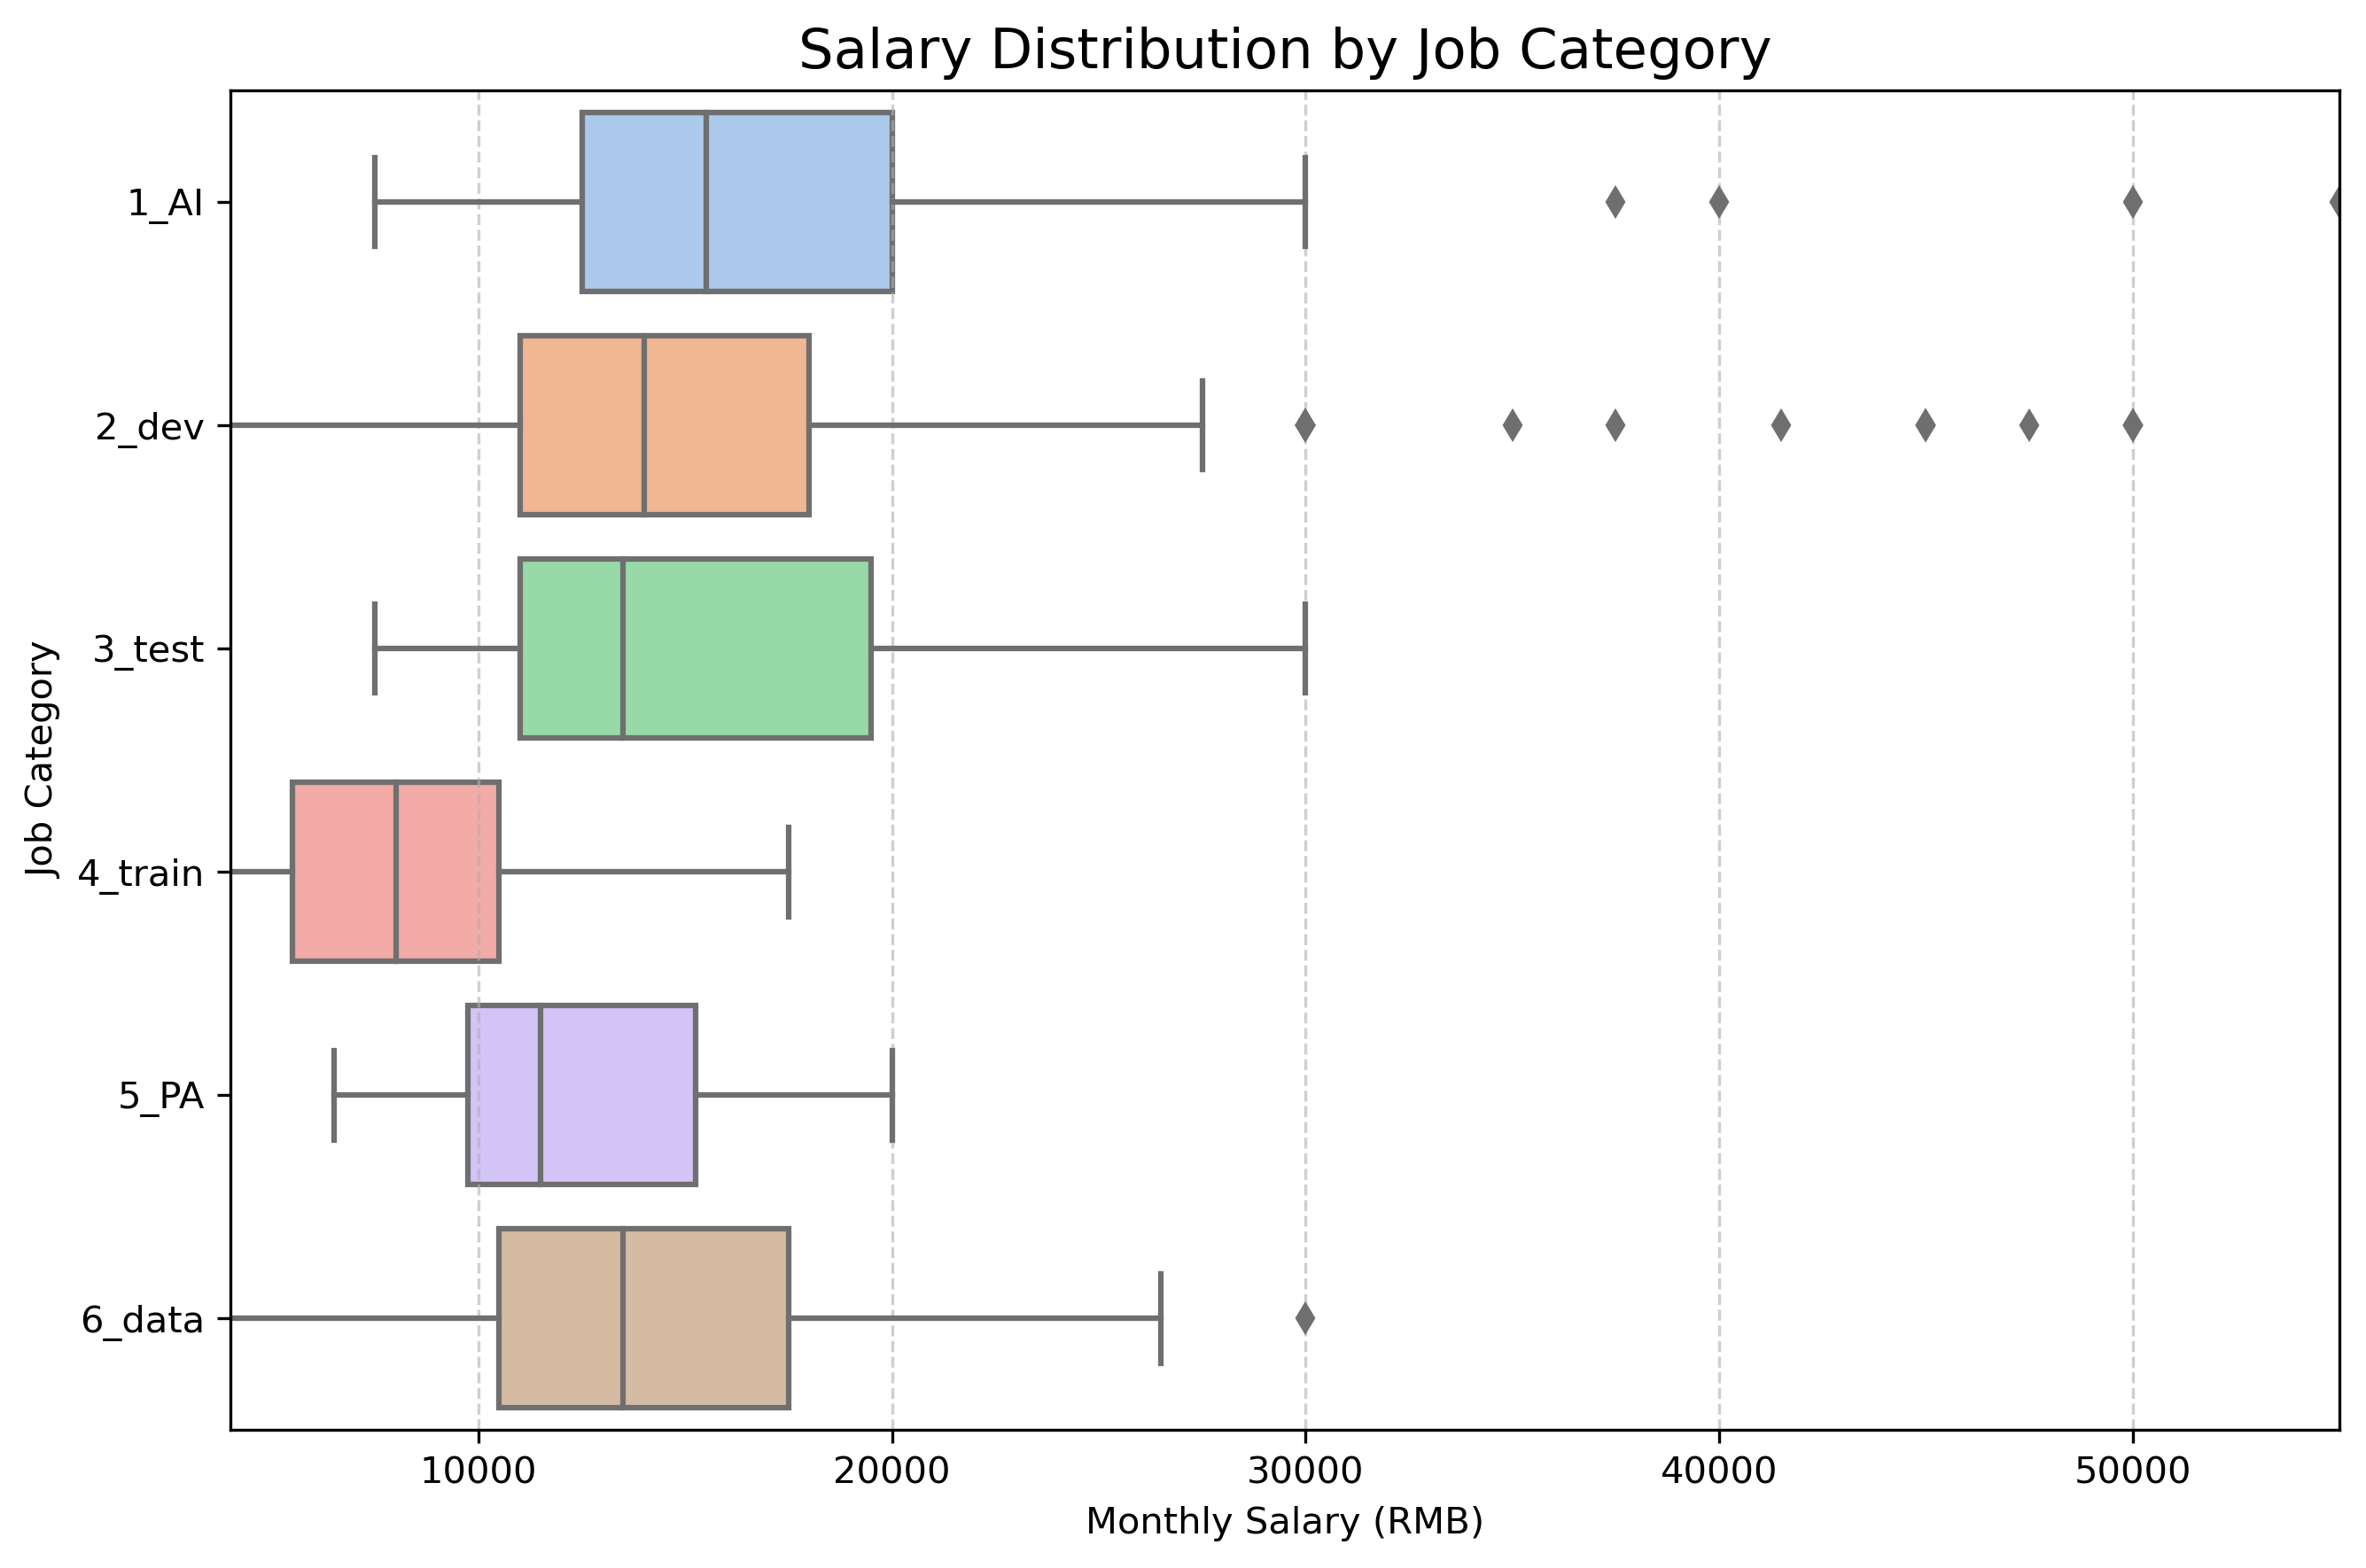

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("coded_factors.csv", encoding='utf-8')

possible_cols = [c for c in df.columns if 'position' in c.lower() or '岗位' in c or '职位' in c]
if not possible_cols:
    raise KeyError("No job column detected. Please check the file column names.")
else:
    position_col = possible_cols[0]
    print(f"Detected position column：{position_col}")


df = df.dropna(subset=[position_col, 'monthly_salary_avg'])
df = df[df['monthly_salary_avg'] > 1000]  
df[position_col] = df[position_col].astype(str)


position_salary = (
    df.groupby(position_col)['monthly_salary_avg']
    .agg(['mean', 'median', 'count'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

print("\nAverage Salary Table by Position：")
print(position_salary.head(10))


plt.figure(figsize=(9,6))
sns.barplot(
    x='mean',
    y=position_col,
    data=position_salary,
    palette='coolwarm'
)
plt.title("Average Monthly Salary by Job Category", fontsize=15)
plt.xlabel("Average Monthly Salary (RMB)")
plt.ylabel("Job Category")

max_salary = position_salary['mean'].max()
plt.xlim(4000, max_salary + 5000)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(9,6))
sns.boxplot(
    x='monthly_salary_avg',
    y=position_col,
    data=df,
    palette='pastel'
)
plt.title("Salary Distribution by Job Category", fontsize=15)
plt.xlabel("Monthly Salary (RMB)")
plt.ylabel("Job Category")
plt.xlim(4000, df['monthly_salary_avg'].max())
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


5. Random Forest Analysis

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [23]:
file_path = "coded_factors_encoded1.csv"
try:
    data = pd.read_csv(file_path)
    print(f" sucessfully read {file_path}，data shape：{data.shape}")
except Exception as e:
    raise ValueError(f"fail to read the file：{str(e)}\nplease check the file path（Eg: 'C:/data/coded_factors_encoded1.csv'）")

required_features = [
    "position_category", "city", "experience_atleast", 
    "education", "nature", "size(employees_number)", "benifit", "bonus_months"
]
target = "monthly_salary_avg"

missing_cols = [col for col in required_features + [target] if col not in data.columns]
if missing_cols:
    raise ValueError(f"lack the important features：{missing_cols}\nPlease verify the CSV column names (note brackets/spaces).")

model_data = data[required_features + [target]].copy()

str_features = []
num_features = []
for col in required_features:
    if model_data[col].dtype == "object":
        str_features.append(col)
    else:
        try:
            pd.to_numeric(model_data[col], errors="raise")
            num_features.append(col)
        except:
            str_features.append(col)

print(f"\nFeature Type Identification Results：")
print(f"- String Features (Requires Encoding)：{str_features}")
print(f"- Numerical Features (Direct Standardization)：{num_features}")

for col in str_features:
    model_data[col].fillna(model_data[col].mode()[0], inplace=True)
for col in num_features:
    model_data[col].fillna(model_data[col].median(), inplace=True)
model_data[target].fillna(model_data[target].median(), inplace=True)

if num_features:
    for col in num_features + [target]:
        mean_val = model_data[col].mean()
        std_val = model_data[col].std()
        model_data = model_data[
            (model_data[col] >= mean_val - 3*std_val) & 
            (model_data[col] <= mean_val + 3*std_val)
        ]

X = model_data[required_features]
y = model_data[target]
print(f"\nAfter data cleaning：Number of samples={len(X)}，Number of features={len(required_features)}")
print(f"Monthly salary range：{y.min():.0f}yuan ~ {y.max():.0f}yuan（Average salary：{y.mean():.0f}yuan）")

 sucessfully read coded_factors_encoded1.csv，data shape：(1665, 10)

Feature Type Identification Results：
- String Features (Requires Encoding)：['position_category', 'nature']
- Numerical Features (Direct Standardization)：['city', 'experience_atleast', 'education', 'size(employees_number)', 'benifit', 'bonus_months']

After data cleaning：Number of samples=1523，Number of features=8
Monthly salary range：2500yuan ~ 30000yuan（Average salary：14383yuan）


In [24]:
transformers = []
if str_features:
    transformers.append(("str_encoder", OneHotEncoder(drop="first", sparse_output=False), str_features))
if num_features:
    transformers.append(("num_scaler", StandardScaler(), num_features))

preprocessor = ColumnTransformer(transformers=transformers)

try:
    X_processed = preprocessor.fit_transform(X)
    print(f"\n Preprocessing successful！")
    print(f"Number of features before preprocessing：{X.shape[1]} → After preprocessing：{X_processed.shape[1]}")
except Exception as e:
    raise ValueError(f"Preprocessing failed：{str(e)}\nPlease check special characters (as space and symbols) in line {str_features}")


 Preprocessing successful！
Number of features before preprocessing：8 → After preprocessing：13


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=X[str_features[0]] if str_features else None 
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf_reg", RandomForestRegressor(random_state=42)) 
])

param_grid = {
    "rf_reg__n_estimators": [100, 200, 300], 
    "rf_reg__max_depth": [8, 12, 16],  
    "rf_reg__min_samples_leaf": [2, 4, 6], 
    "rf_reg__max_features": ["sqrt", "log2"] 
}


print("\nBegin Random Forest tuning (approximately 5-10 minutes, depending on sample size)...")
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_r2_cv = grid_search.best_score_

print(f"\n Optimal parameter combination：")
for param, val in grid_search.best_params_.items():
    print(f"  - {param}: {val}")
print(f"R²：{best_r2_cv:.4f} ")


Begin Random Forest tuning (approximately 5-10 minutes, depending on sample size)...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

 Optimal parameter combination：
  - rf_reg__max_depth: 8
  - rf_reg__max_features: sqrt
  - rf_reg__min_samples_leaf: 2
  - rf_reg__n_estimators: 100
R²：0.3076 


 save as：rf_city_position_heatmap_your_data.png


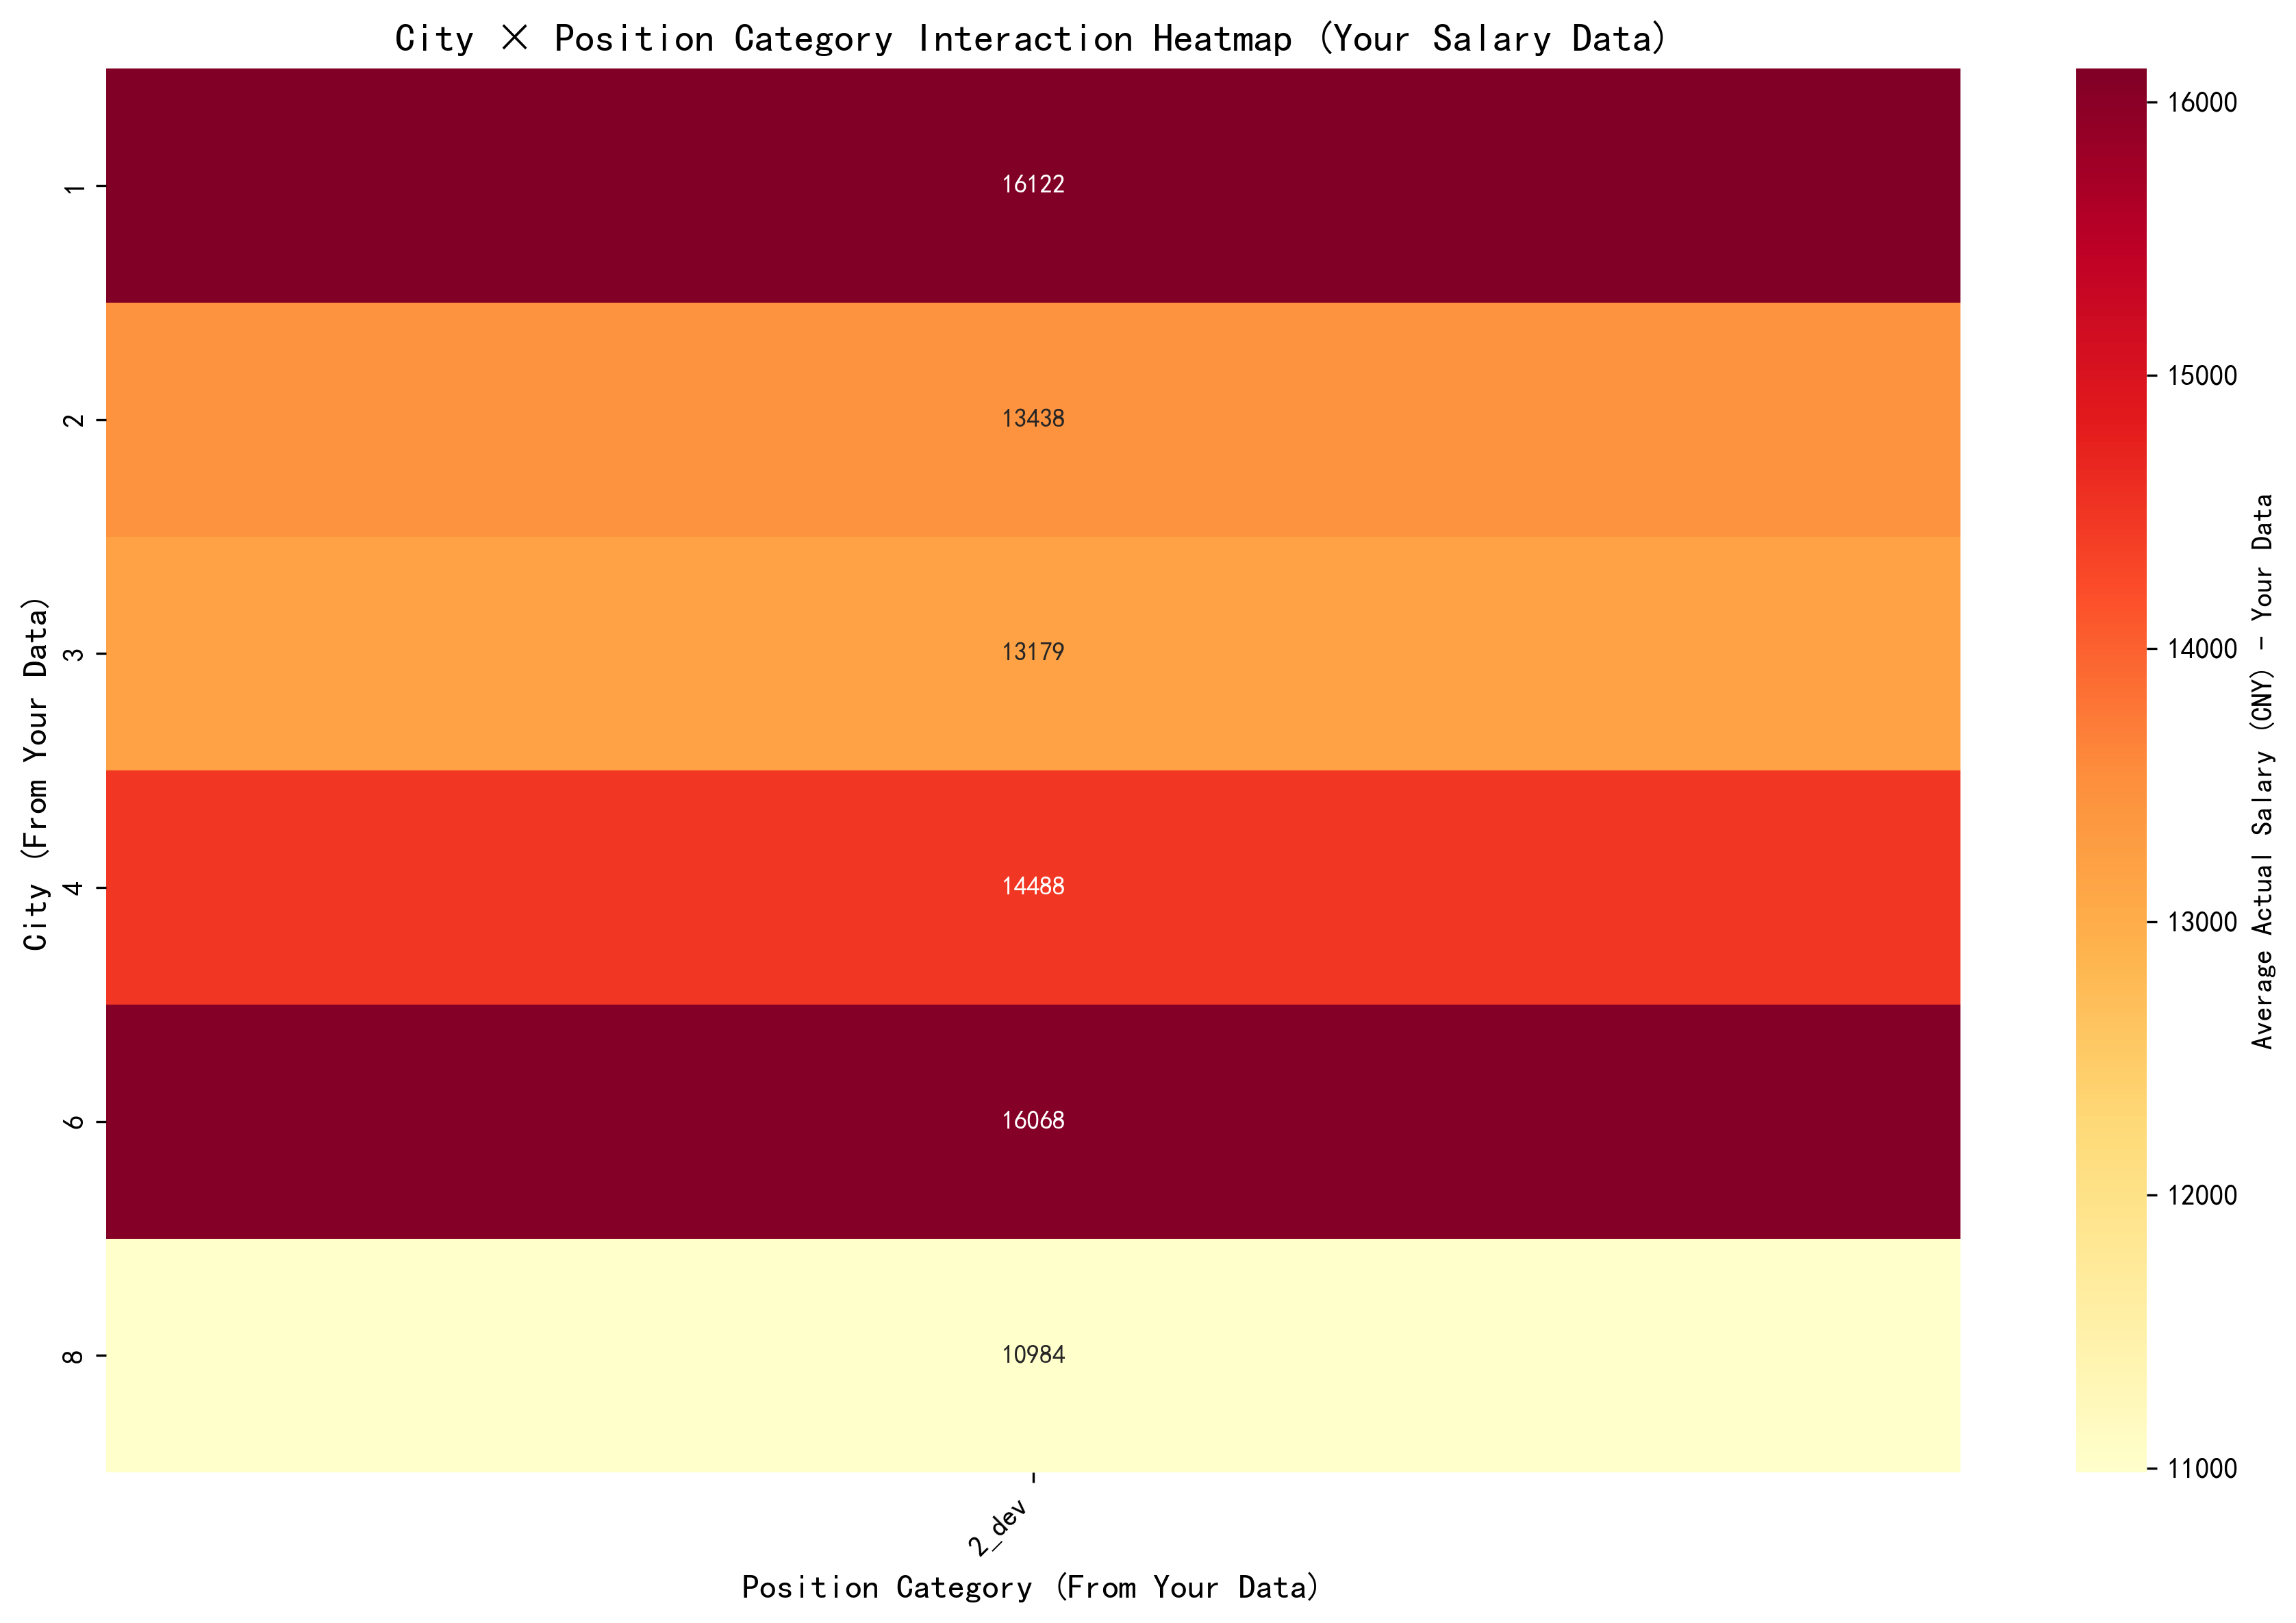

In [20]:
import pandas as pd
import seaborn as sns

interaction_df = X_test[["city", "position_category"]].copy()
interaction_df["actual_salary"] = y_test.values  

grouped = interaction_df.groupby(["city", "position_category"]).agg(
    avg_salary=("actual_salary", "mean"),
    sample_count=("actual_salary", "count")
).reset_index()
grouped_valid = grouped[grouped["sample_count"] >= 10]  


heatmap_data = grouped_valid.pivot(
    index="city", 
    columns="position_category", 
    values="avg_salary"
).fillna(interaction_df["actual_salary"].mean()) 


plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".0f", 
    cmap="YlOrRd", 
    cbar_kws={"label": "Average Actual Salary (CNY) - Your Data"},
    annot_kws={"fontsize": 9} 
)
plt.xlabel("Position Category (From Your Data)", fontsize=12)
plt.ylabel("City (From Your Data)", fontsize=12)
plt.title("City × Position Category Interaction Heatmap (Your Salary Data)", fontsize=14)
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
plt.savefig("rf_city_position_heatmap_your_data.png", dpi=300, bbox_inches="tight")
print(" save as：rf_city_position_heatmap_your_data.png")

6. Clustering

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv(r'coded_factors.csv')

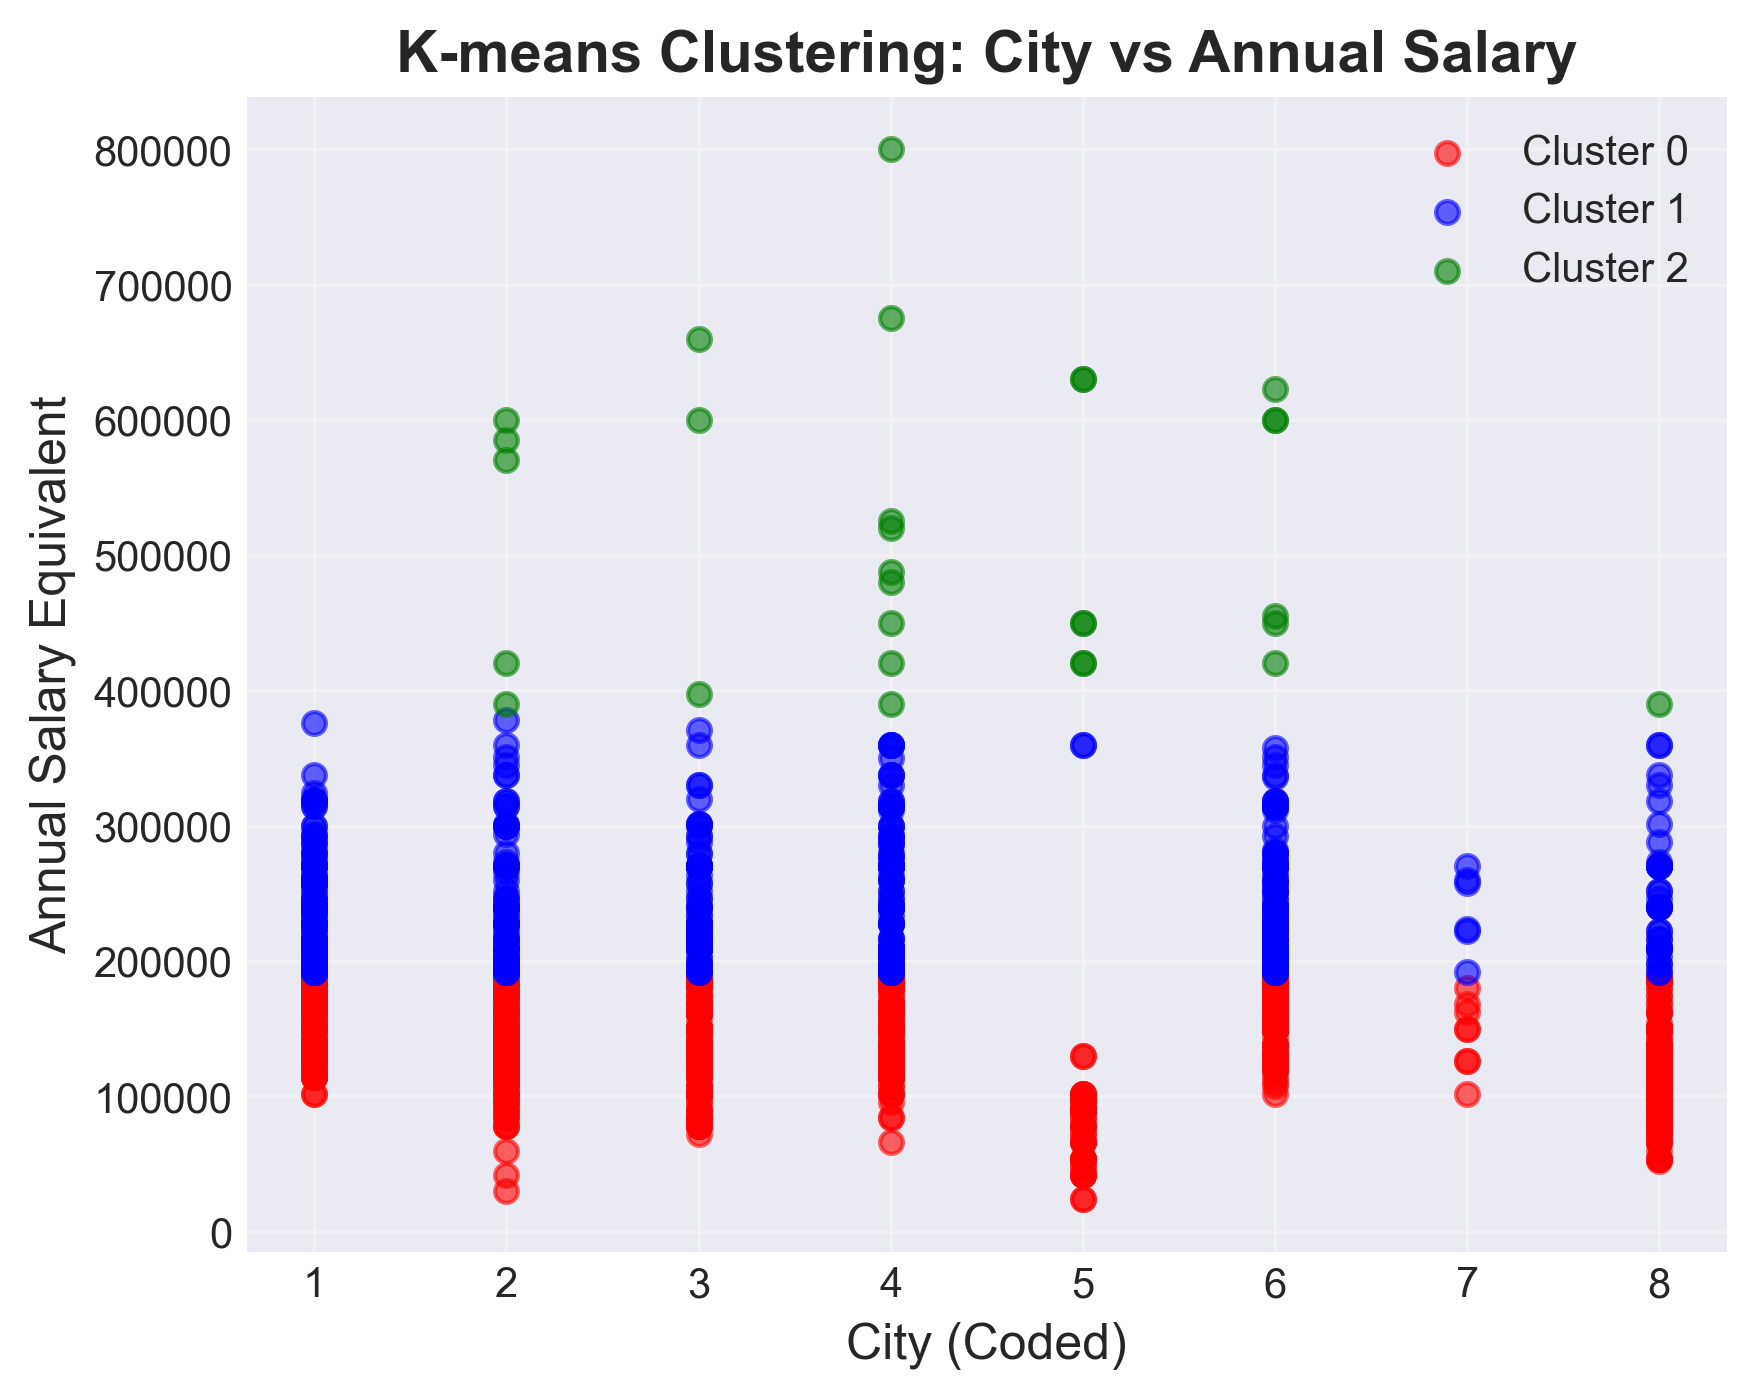

In [68]:
# 1. city vs. annual_salary_equiv
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_city = df[['city', 'annual_salary_equiv']].dropna()
kmeans_city = KMeans(n_clusters=3, random_state=42, n_init=10)
X_city['cluster'] = kmeans_city.fit_predict(X_city)
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = X_city[X_city['cluster'] == i]
    plt.scatter(cluster_data['city'], cluster_data['annual_salary_equiv'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=30)
plt.xlabel('City (Coded)', fontsize=12)
plt.ylabel('Annual Salary Equivalent', fontsize=12)
plt.title('K-means Clustering: City vs Annual Salary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

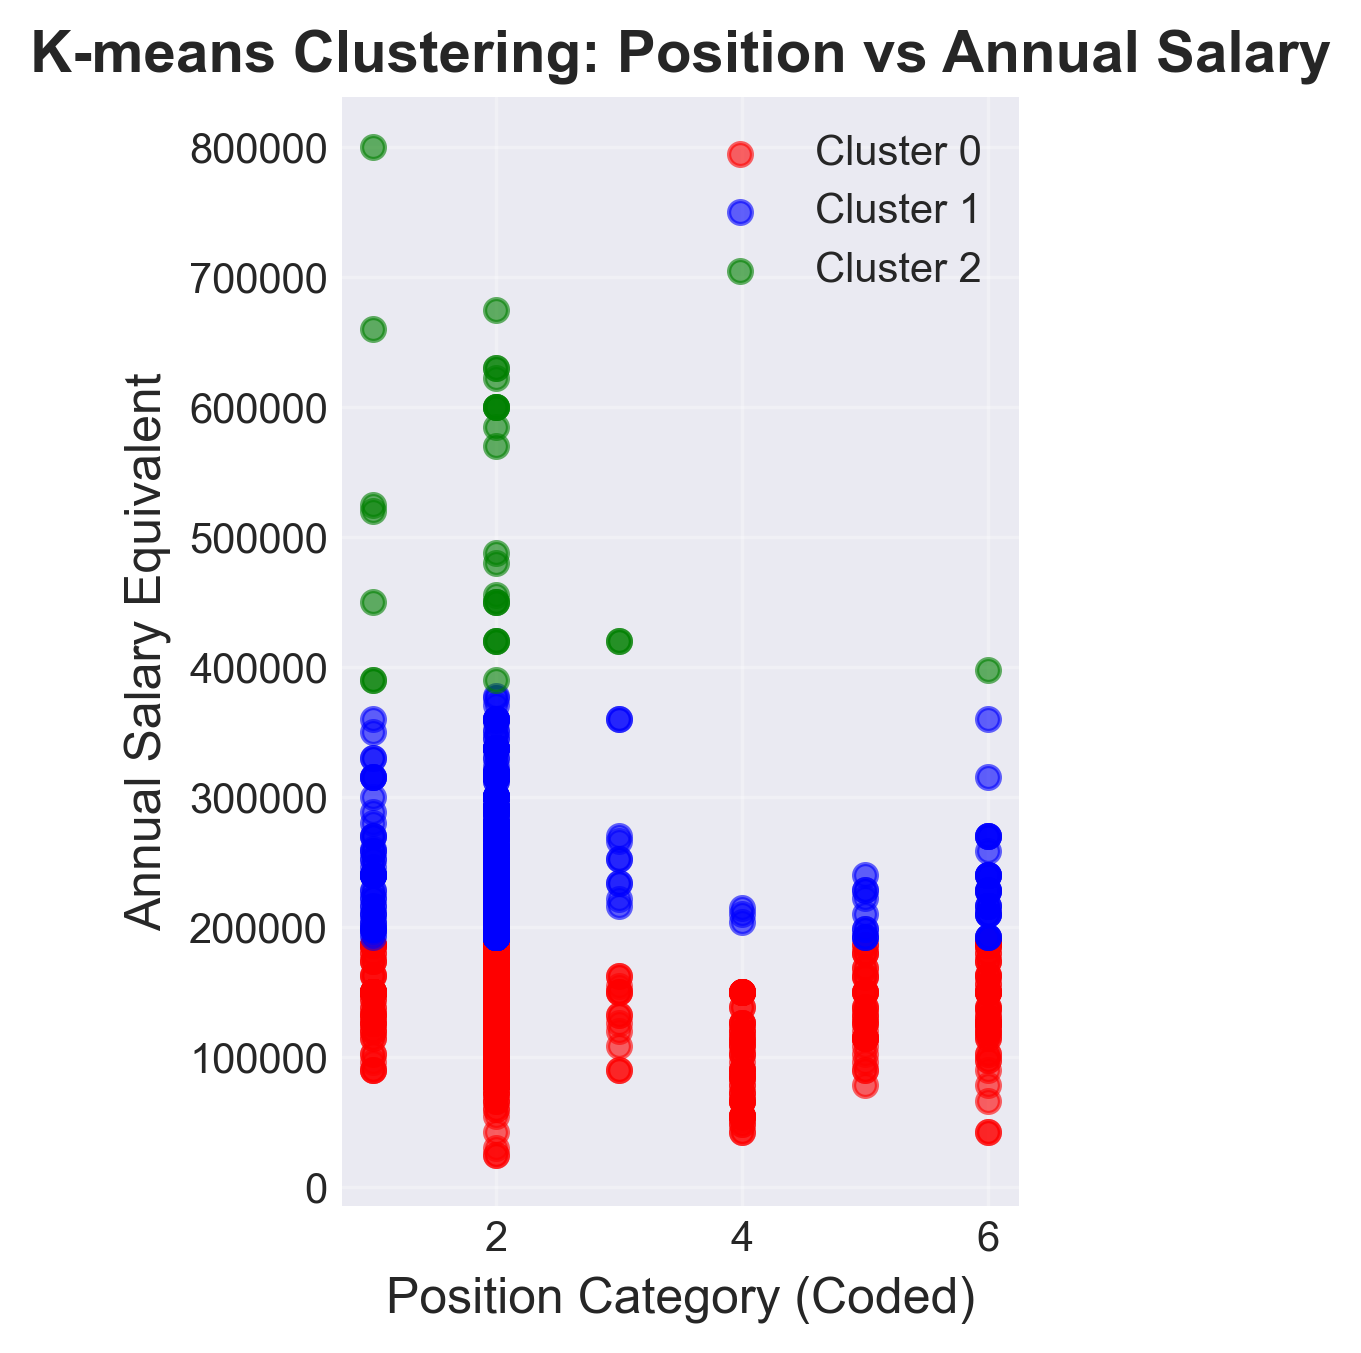

In [69]:
# 2. position_category vs. annual_salary_equiv
plt.subplot(1, 2, 2)
df['position_num'] = df['position_category'].str.extract(r'(\d+)').astype(float)
X_position = df[['position_num', 'annual_salary_equiv']].dropna()
kmeans_position = KMeans(n_clusters=3, random_state=42, n_init=10)
X_position['cluster'] = kmeans_position.fit_predict(X_position)
for i in range(3):
    cluster_data = X_position[X_position['cluster'] == i]
    plt.scatter(cluster_data['position_num'], cluster_data['annual_salary_equiv'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=30)
plt.xlabel('Position Category (Coded)', fontsize=12)
plt.ylabel('Annual Salary Equivalent', fontsize=12)
plt.title('K-means Clustering: Position vs Annual Salary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

In [70]:
print(f"\nCluster centers for city:\n{kmeans_city.cluster_centers_}")
print(f"\nCluster centers for position:\n{kmeans_position.cluster_centers_}")


Cluster centers for city:
[[4.27909270e+00 1.36238166e+05]
 [3.54589372e+00 2.44795491e+05]
 [4.30000000e+00 5.16916667e+05]]

Cluster centers for position:
[[2.40039448e+00 1.36238166e+05]
 [2.17874396e+00 2.44795491e+05]
 [1.96666667e+00 5.16916667e+05]]


In [71]:
# Summary
print("\n Annual salary Clustering")
for i in range(3):
    cluster_data = X_city[X_city['cluster'] == i]
    print(f"Cluster {i}: {len(cluster_data)} samples, "
          f"average Salary: {cluster_data['annual_salary_equiv'].mean():.0f}")


 Annual salary Clustering
Cluster 0: 1014 samples, average Salary: 136238
Cluster 1: 621 samples, average Salary: 244795
Cluster 2: 30 samples, average Salary: 516917


7. Evaluation

7.1 Evaluation of Regression


Random Forest Model Test Set Evaluation Results
R²：0.2842 
MAE：3193.47 yuan
MSE: 15874223.67, RMSE: 3984.25
training R² vs testing R²：0.3076 vs 0.2842

 The plot of actual values vs. predicted values has been saved as：rf_salary_true_vs_pred.png
 importance feature saves as：rf_feature_importance.png


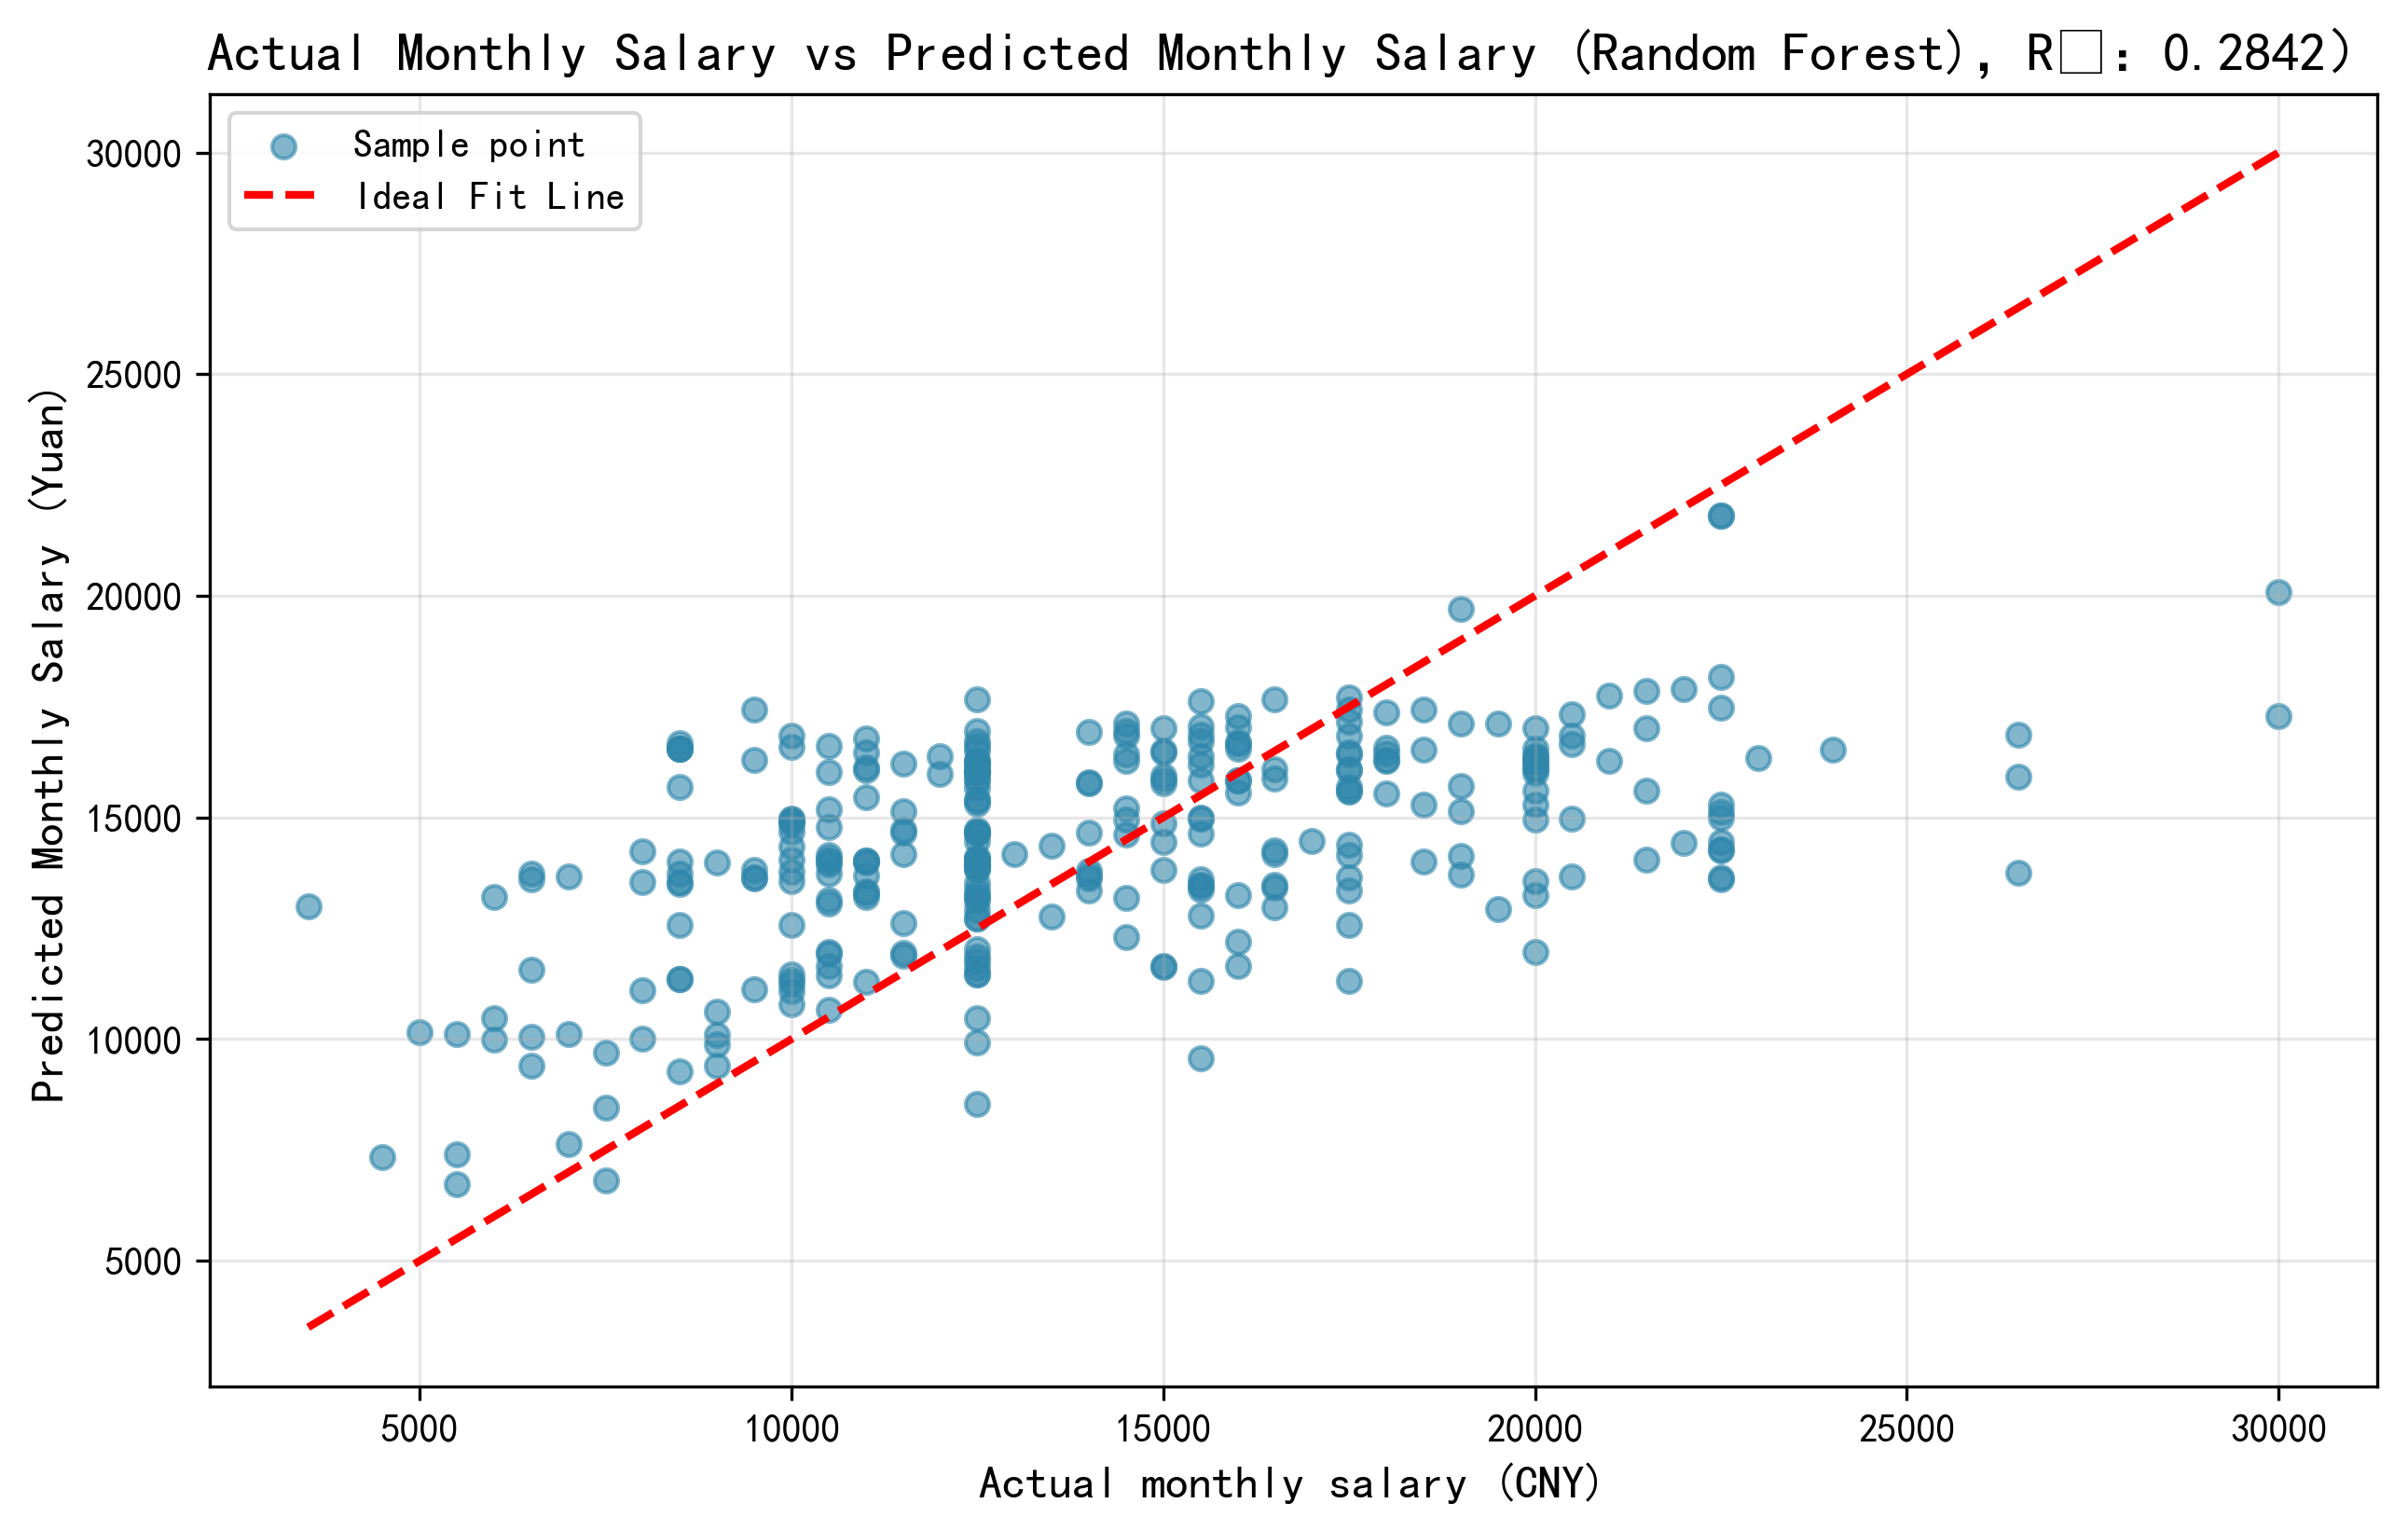

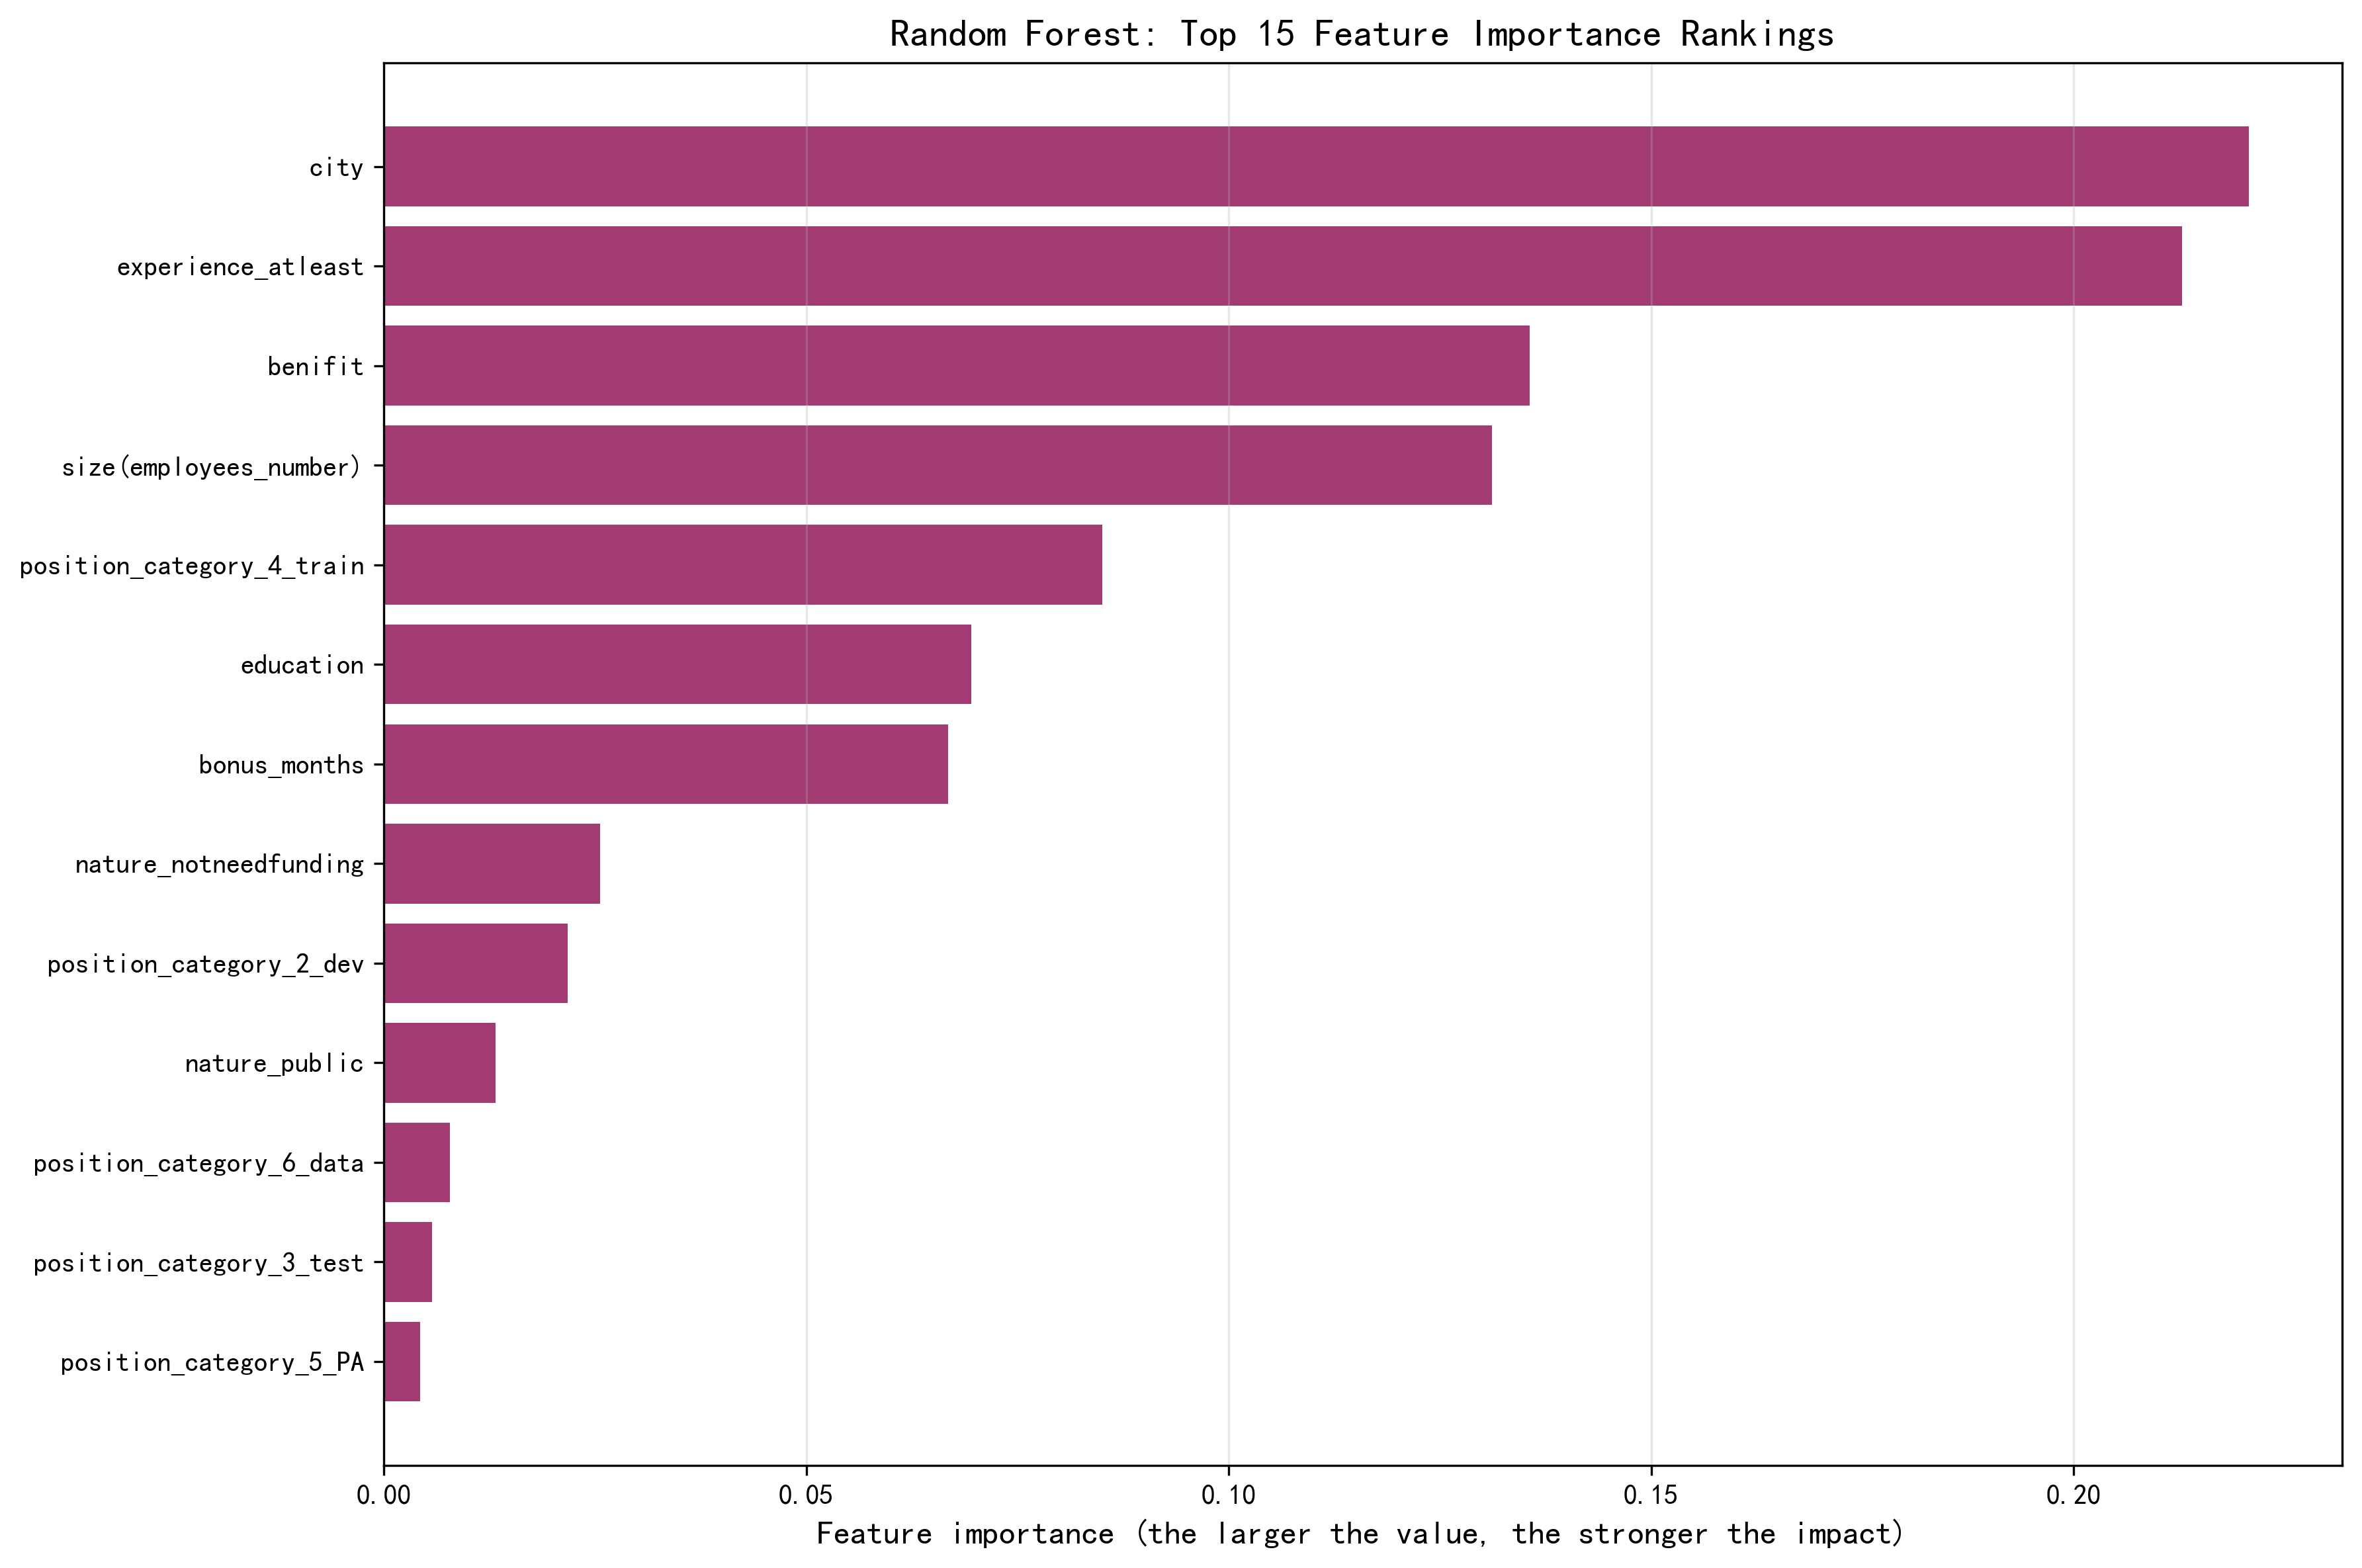

In [27]:
from sklearn.metrics import mean_squared_error
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)

print("\n" + "="*60)
print("Random Forest Model Test Set Evaluation Results")
print("="*60)
print(f"R²：{test_r2:.4f} ")
print(f"MAE：{test_mae:.2f} yuan")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}")
print(f"training R² vs testing R²：{best_r2_cv:.4f} vs {test_r2:.4f}")

# Visualization 1
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="#2E86AB", label="Sample point")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2, label="Ideal Fit Line")
plt.xlabel("Actual monthly salary (CNY)", fontsize=12)
plt.ylabel("Predicted Monthly Salary (Yuan)", fontsize=12)
plt.title(f"Actual Monthly Salary vs Predicted Monthly Salary (Random Forest)，R²：{test_r2:.4f}）", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig("rf_salary_true_vs_pred.png", dpi=300, bbox_inches="tight")
print("\n The plot of actual values vs. predicted values has been saved as：rf_salary_true_vs_pred.png")

# Visualization 2
rf_model = best_model.named_steps["rf_reg"]

feature_names = []
if str_features:
    encoder = best_model.named_steps["preprocessor"].transformers_[0][1]
    feature_names.extend(encoder.get_feature_names_out(str_features))
if num_features:
    feature_names.extend(num_features)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": rf_model.feature_importances_
}).sort_values("importance", ascending=False)

# Visualization 3
plt.figure(figsize=(12, 8))
top15 = importance_df.head(15)
plt.barh(range(len(top15)), top15["importance"], color="#A23B72")
plt.yticks(range(len(top15)), top15["feature"], fontsize=10)
plt.xlabel("Feature importance (the larger the value, the stronger the impact)", fontsize=12)
plt.title("Random Forest: Top 15 Feature Importance Rankings", fontsize=14)
plt.gca().invert_yaxis()  
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300, bbox_inches="tight")
print(" importance feature saves as：rf_feature_importance.png")


 Residual plot saves as：rf_residual_analysis_your_data.png


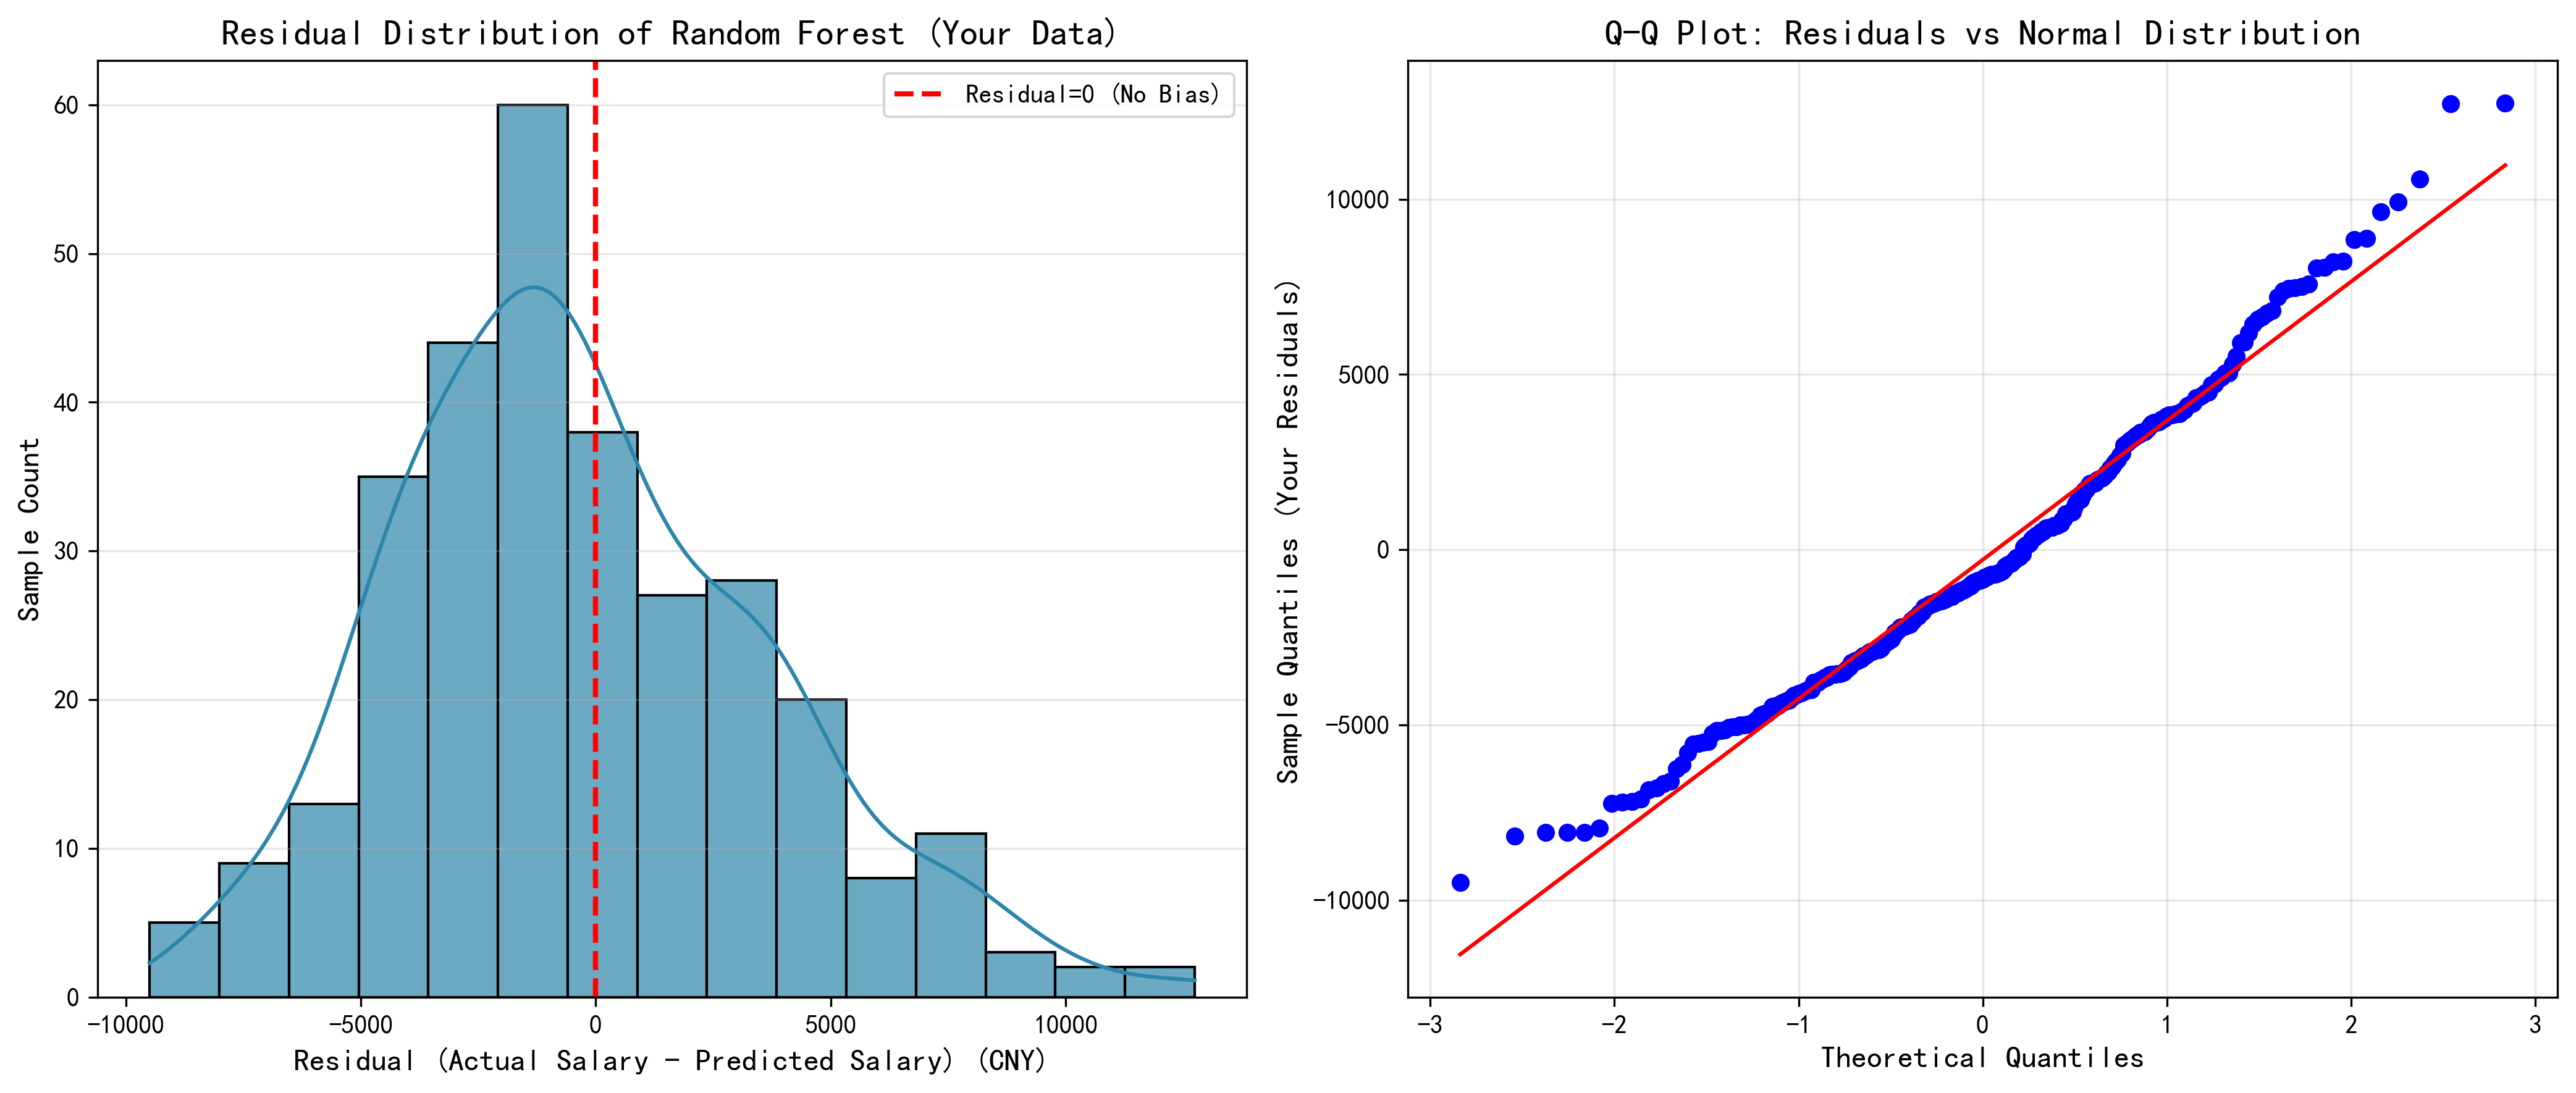

In [19]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

residuals = y_test.values - y_pred 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    residuals, 
    kde=True, 
    ax=ax1, 
    color="#2E86AB", 
    alpha=0.7,
    edgecolor="black"  
)
ax1.axvline(x=0, color="red", linestyle="--", linewidth=2, label="Residual=0 (No Bias)")
ax1.set_xlabel("Residual (Actual Salary - Predicted Salary) (CNY)", fontsize=12)
ax1.set_ylabel("Sample Count", fontsize=12)
ax1.set_title("Residual Distribution of Random Forest (Your Data)", fontsize=14)
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_xlabel("Theoretical Quantiles", fontsize=12)
ax2.set_ylabel("Sample Quantiles (Your Residuals)", fontsize=12)
ax2.set_title("Q-Q Plot: Residuals vs Normal Distribution", fontsize=14)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("rf_residual_analysis_your_data.png", dpi=300, bbox_inches="tight")
print("\n Residual plot saves as：rf_residual_analysis_your_data.png")

7.2 Evaluation of Clustering

In [73]:
#Evaluation 1: City vs Anuual Salary
# Quantitative Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = df[['city', 'annual_salary_equiv']].dropna()
labels = X_city['cluster']

sil_score = silhouette_score(X[['city','annual_salary_equiv']], labels)
db_score = davies_bouldin_score(X[['city','annual_salary_equiv']], labels)
print(f"Silhouette Score: {sil_score:.3f}, Davies-Bouldin: {db_score:.3f}")

Silhouette Score: 0.594, Davies-Bouldin: 0.523


In [74]:
# Statistical Evaluation 
X_city.groupby('cluster')['annual_salary_equiv'].agg(['count','mean','median'])

count           mean    median
cluster                                
0         1014  136238.165680  138000.0
1          621  244795.491143  240000.0
2           30  516916.666667  483750.0

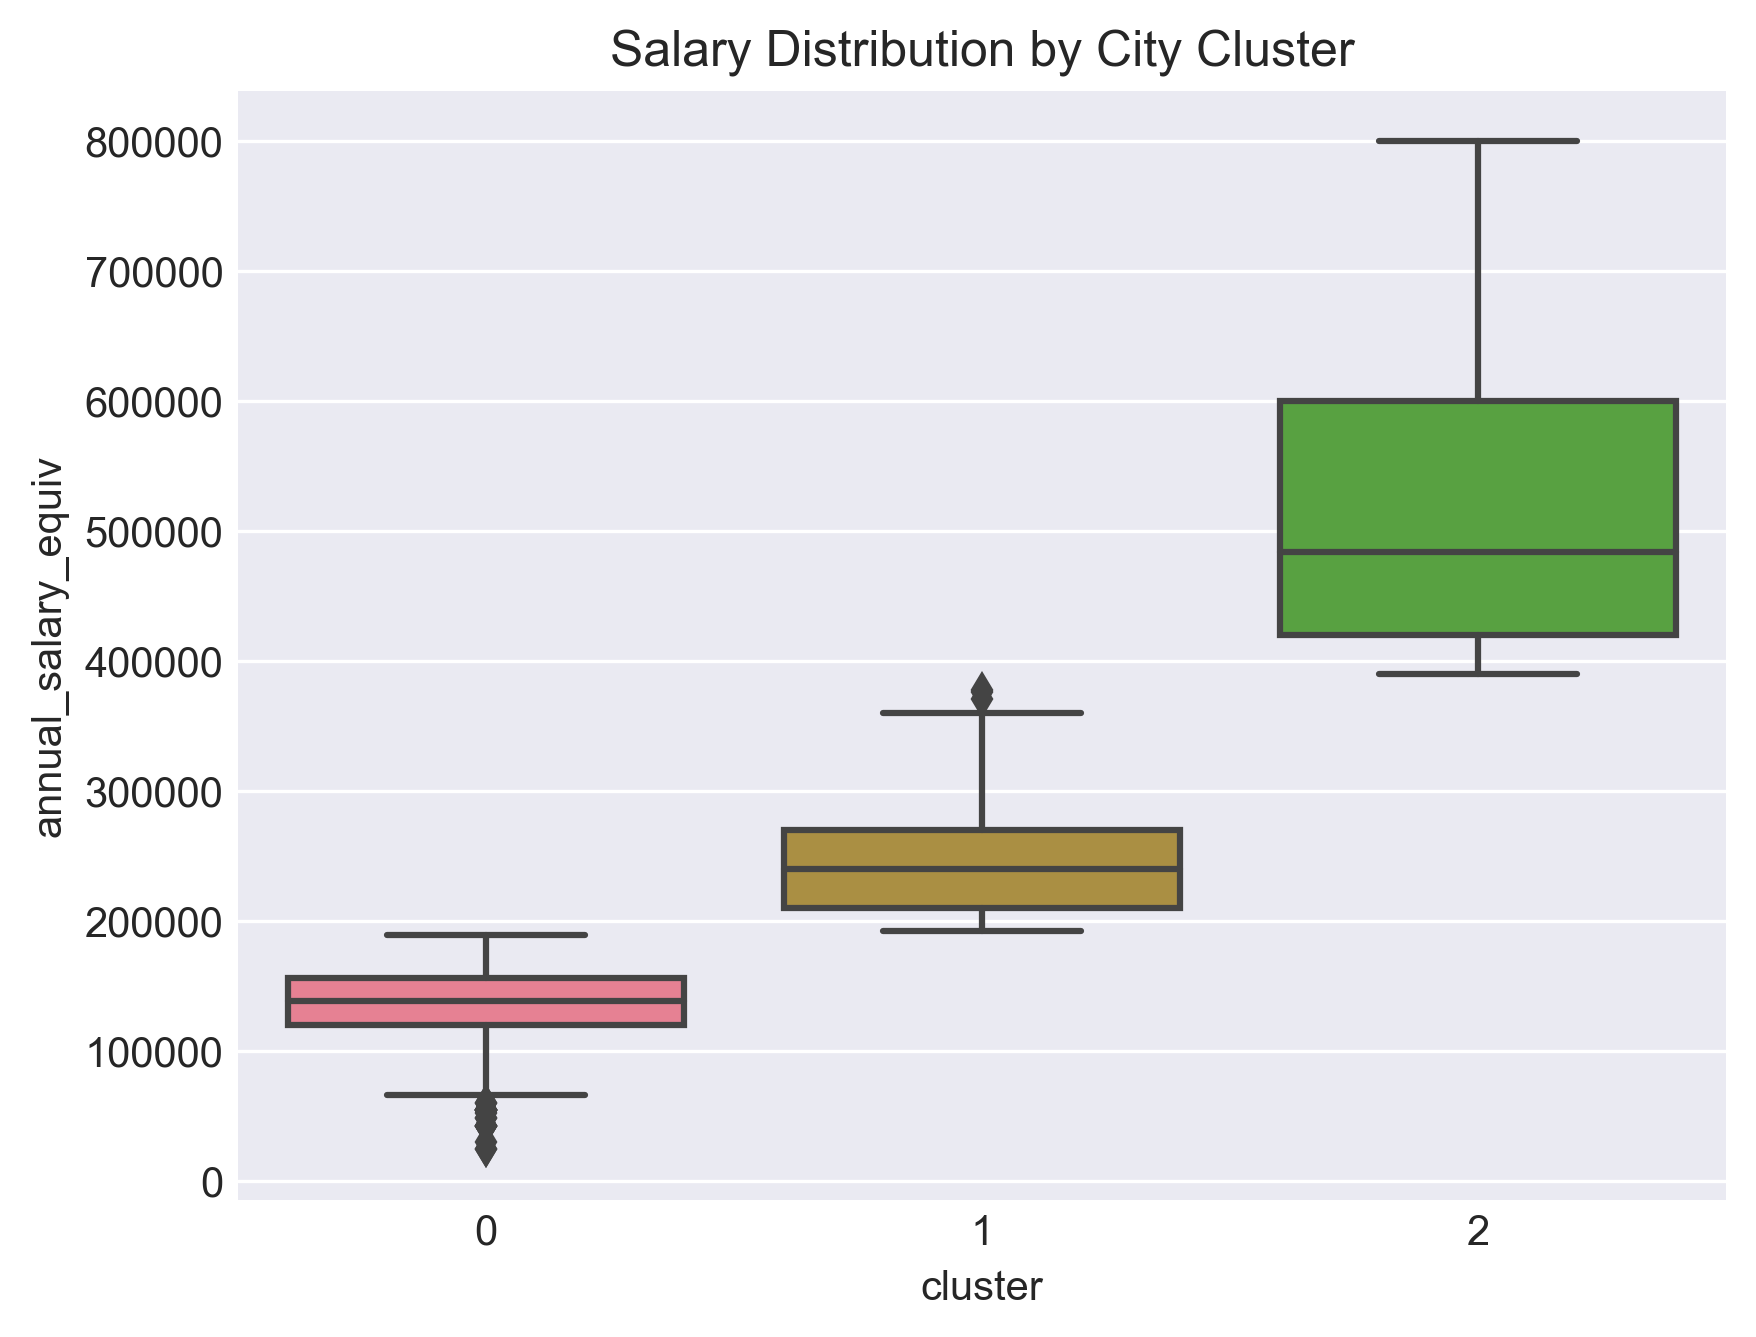

In [75]:
#Visualization Explanation
import seaborn as sns
sns.boxplot(x='cluster', y='annual_salary_equiv', data=X_city)
plt.title('Salary Distribution by City Cluster')
plt.show()

In [76]:
#Evaluation 2: Position vs Annual Salary
#Quantitative Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_pos = silhouette_score(X_position[['position_num','annual_salary_equiv']], X_position['cluster'])
db_pos = davies_bouldin_score(X_position[['position_num','annual_salary_equiv']], X_position['cluster'])

print(f"Silhouette Score: {sil_pos:.3f}, Davies-Bouldin Index: {db_pos:.3f}")

Silhouette Score: 0.594, Davies-Bouldin Index: 0.523


In [77]:
# Statistical Evaluation
X_position.groupby('cluster')['annual_salary_equiv'].agg(['count', 'mean', 'median'])

count           mean    median
cluster                                
0         1014  136238.165680  138000.0
1          621  244795.491143  240000.0
2           30  516916.666667  483750.0

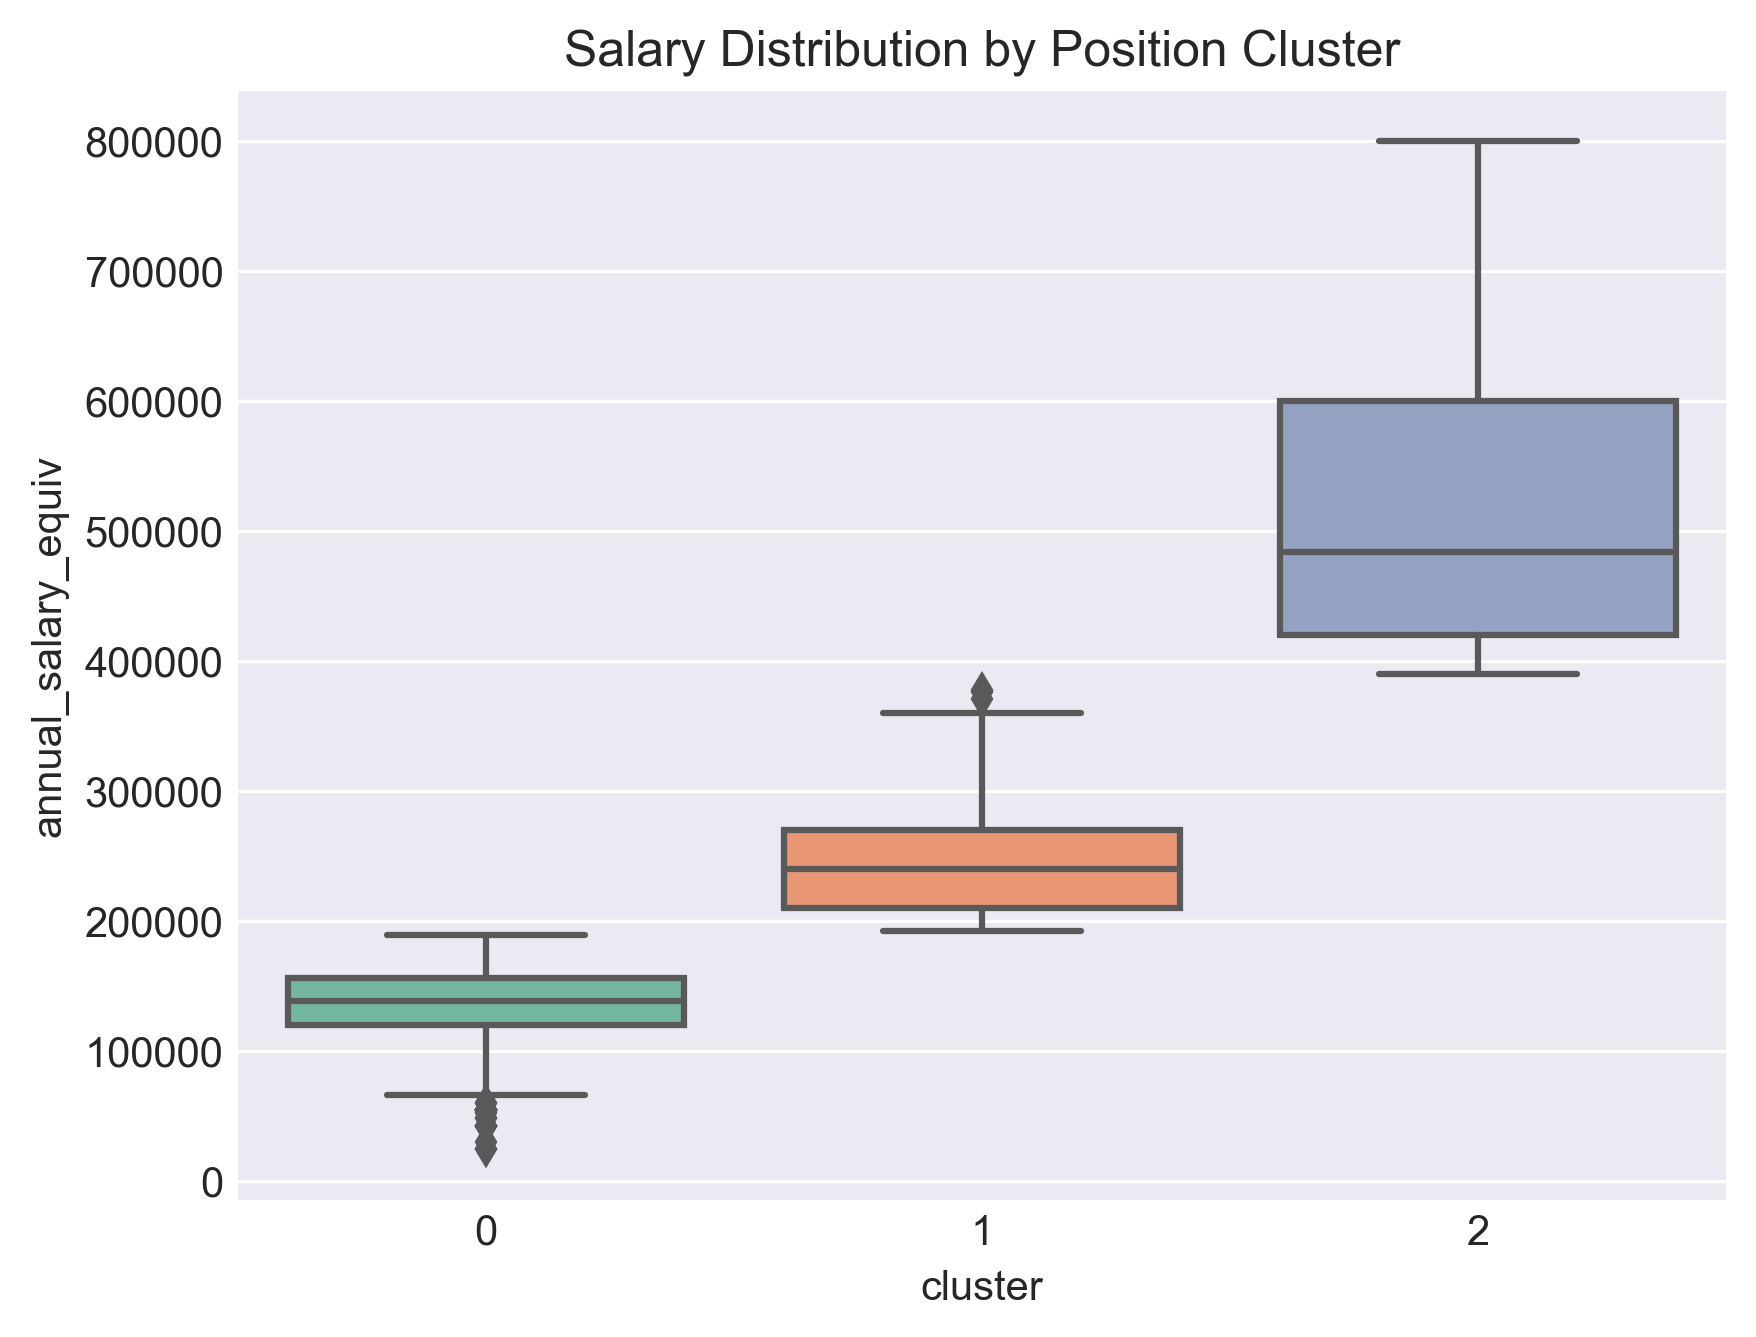

In [78]:
#Visualization Explanation
import seaborn as sns
sns.boxplot(x='cluster', y='annual_salary_equiv', data=X_position, palette='Set2')
plt.title('Salary Distribution by Position Cluster')
plt.show()